In [101]:
#import modules

from gensim.models import KeyedVectors
import gensim
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import copy
import random
from matplotlib import cm
import matplotlib as mpl
import json

#data preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize, scale, MinMaxScaler


#clustering modules
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

%matplotlib inline

#Graph embeddings visualization 
from adjustText import adjust_text
#https://stackoverflow.com/questions/19073683/matplotlib-overlapping-annotations-text


#utilities
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [102]:
#data directories
embedding_vector_file = "../data/embedding_vec.emb"
vocabulary_file = "../data/vocabulary.txt"
bookmark_file = "../data/bookmark.json"

In [103]:
#keywords

energy_efficiency=[
    
     #design phase
    ["life_cycle_assessment","lca"],
    ["passive_design", "passive_strategies","passive_cooling"],
    ["ubem","urban_building_energy_modeling", "urban_building_energy_models"],
    ["parametric_design"],
    ["hvac_optimization","hvac_system_optimization"],
    ["district_energy_system"],
#     "thermal_comfort",

    
    #construction phase
    ["measurement_and_verification"],
    ["retro-commissioning","ongoing_commissioning", "continuous_commissioning"],
    ["energy_audit"],


    #operation phase
    ["model_predictive_control"],
    ["demand_response","demand_side_management","load_management"],
    ["energy_benchmarking", "building_energy_benchmarking"],
    ["fault_detection_and_diagnosis","fdd","fault_detection"],
    ["om"],
    ["demand_controlled_ventilation","dcv","demand-controlled_ventilation"],
    ["renewable_energy","renewable_energy_sources","renewable_energies"],
    
    #retrofit
    ["retrofit_analysis","retrofit"],
    
]

phase=[
        
#     #lifecycle phase
    ["design-stage","early_design_stage",'early_design_stages',"preliminary_design","conceptual_design"],
    ["construction_stage","construction_phase"],
    ["building_commissioning","commissioning","commissioned"],
    ["operation_and_maintenance","building_operation","operational"],
    ["building_retrofit"],
    
]

data_science = [
     #Datascience_algorithm
    #design phase
    ["energy_simulation","building_energy_simulation"],
    ["optimization", "optimize", "optimizing"],
    ["multi-objective_optimization", "multi-objective"],


    #comissioinng
    ["data_collection"],
    ["measurement"],

    #operation phase
    ["neural_networks","deep_learning", "neural_networks"],
    ["reinforcement_learning", "rl", "deep_reinforcement_learning"],
    ["validation", "validate"],
    
    ["feature_extraction", "feature_selection"],
    ["anomaly_detection", "outlier_detection"],

    ["clustering", "clusters"],
    ["dimensionality_reduction", "dimension_reduction"],
    ["segmentation"],
    ["classification", "classified", "classes"],

    ["statistical_analysis", "statistical", "statistical_methods"],
    ["regression", "regression_model", "regression_analysis", "regression_models"],
    ["correlation", "correlated"],

    
    
    ["data_visualization","visualization", "visualisation", "dashboard"],
    ["factor_analysis","efa", "cfa", "confirmatory"],
    ["generative_adversarial_networks", "generative_adversarial_network"],

]
data=[
    #data
    ["baseline_models"],
    ["ecm","ecms"],
    ["air_speed","air_velocity","airflow","air_flow"],
    ["wind_direction","prevailing"],
    ["wind_speed","prevailing"],
    ["indoor_air_temperature","air_temperature","temperature"],
    ["outdoor_air_temperature"],["outdoor_temperature"],
    ["relative_humidity","humidity"],
    ["time-step"],
    ["heat_balance"],
    ["energy_balance"],
    ["heat_transfer"],
    ["carbon_dioxide"],
    ["site","location"],
    ["weather_data","weather_file","weather_files","weather_station"],
    ["dry_bulb_temperature","dry-bulb"],
    ["dew_point"],
    ["energy_consumption", "building_energy_use", "energy_consumption_data"],
    ["schedule","schedules","scheduling","occupancy_schedule","occupancy_schedules","occupancy","occupancy_patterns"],
    ["ahu","air_handling_unit","ahus"],
    ["energy_price","electricity_price","electricity_prices"],
    ["cost_savings","cost_saving"],
    ["building_envelope","envelope"],
    ["building_geometry"],
    ["material_properties","thermal_properties"],
    ["glazing","solar_heat_gain","shgc"],
    ["shading_devices","shading","blinds"],
    ["building_orientation","orientation"],
    ["zone","zones","thermal_zones"],
    ["surface","surfaces"],
    ["thermal_mass","internal_mass"],
    ["building_form","building_shape"],
    ["passive_design_strategies", "passive_strategies"],
    ["natural_ventilation","cross_ventilation"],
    ["internal_heat_gains","internal_gains","heat_gain"],
    ["lights","lamps","lighting","artificial_lighting"],
    ["equipment","appliances"],
    ["daylighting","daylight","illuminance"],
    ["mass_flow_rate"],
    ["inlet_temperature"],
    ["outlet_temperature"],
    ["cooling_load","cooling_loads","cooling_energy"],
    ["heating_load","heat_load"],
    ["chilled_water","chilled_water_temperature"],
    ["chiller","chillers"],
    ["cop","coefficient_of_performance"],
    ["hot_water"],
    ["compressor_power"],
    ["condenser_fan_power"],
    ["condensing_temperature"],
    ["fan_power","fan_power_consumption"],["fan_speed"],
    ["set_point","set-point","set_points"],
    ["water_temperature"],
    ["heating_load","heating_energy","heating_energy_consumption","heating_demand", "heating_loads"],
    ["cooling_load","cooling_demand", "heating_loads","cooling_energy","cooling_energy_consumption"],
    ["variable_air_volume","vav","variable-air-volume"],
    ["constant_air_volume", "cav"],
    ["static_pressure"],["differential_pressure"],
    ["thermal_comfort"],
    ["damper","dampers"],
    ["air-to-air"],
    ["air-to-water"],
    ["heat_recovery"],
    ["load_profile","load_scheduling"],
    ["time-of-use","tou"],
    ["household_appliances"],
    ["energy_storage"],
    ["smart_meters","smart_metering"],
    ["post-occupancy_evaluation","post-occupancy"],
    ["coefficient_of_variation"],
    ["calibrated_model"],
    ["electricity_pricing","utility_bills","energy_bills"],
    ["cost_analysis"],
    ["control_algorithms"],
    ["pmv","predicted_mean_vote","thermal_comfort_index"],
    ["ppd","thermal_comfort_index"],
    ["thermal_sensation"],
    ["operative_temperature"],
    ["mean_radiant_temperature"],
    ["clothing_insulation"],
    ["thermal_comfort_index"],
    ["ashrae_guideline_14"],
    ["calibrated_simulation"],
    ["occupant_behavior","occupant_behaviour"],
    ["noise_level"],
    ["eui","energy_intensity"],["historical_data"],
    ["real-time"],
    ["meter_readings","meter_reading","smart_meter_data"],
    ["heating_degree_days","hdd","hdds"],
    ["cooling_degree_days","cdd","cdds"],
    ["performance_measurement_and_verification","ipmvp"] 
]


In [104]:
#Word2vec model
model = gensim.models.KeyedVectors.load_word2vec_format(fname=embedding_vector_file, unicode_errors='strict')

In [105]:
#example: 
model.most_similar(["regression"], topn=5)

[('linear_regression', 0.7257593274116516),
 ('regression_model', 0.6906780004501343),
 ('regression_analysis', 0.6445683836936951),
 ('regression_models', 0.6441797614097595),
 ('least_squares', 0.6422460675239563)]

In [123]:
#utility functions 
def create_color_bar(min_v = 0, max_v = 5.0, color_map = cm.Blues, bounds = range(6)):
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)

    norm = mpl.colors.Normalize(min_v, max_v)
    if bounds!= None:
        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=color_map,
                                        norm=norm,
                                        boundaries = bounds,
                                        orientation='horizontal')
    else:
        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=color_map,
                                        norm=norm,
                                        orientation='horizontal')
        
    cb1.set_label('relation_strength')
    fig.show()
    plt.show()
    display(HTML("<hr>"))

In [116]:
#here we create a dictionary of pairs of relations
relations = {
    "data_science-phase":(data_science,phase),
    
    "data_science-data":(data_science, data),
    
    "energy_efficiency-data":(energy_efficiency,data ),
    
    "energy_efficiency-data_science":(energy_efficiency, data_science),
    
    "phase-energy_efficiency":(phase, energy_efficiency),
}

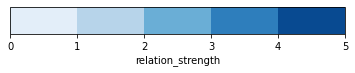

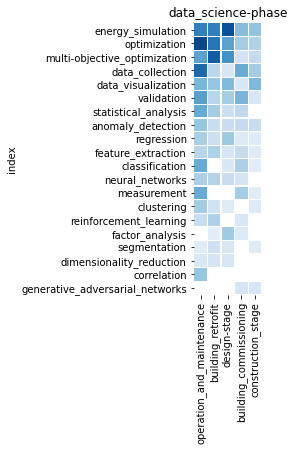

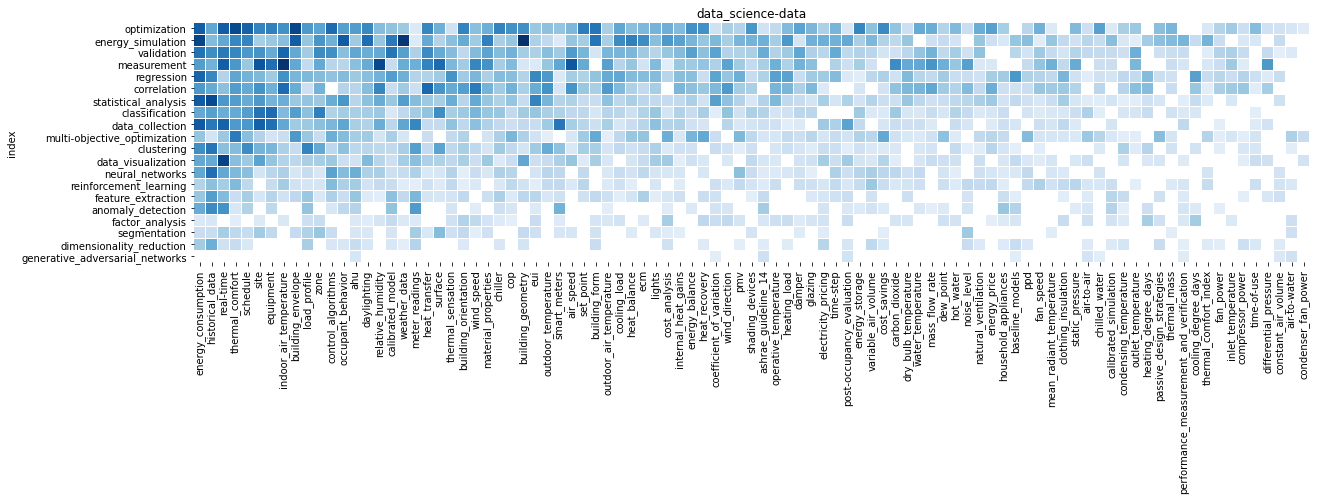

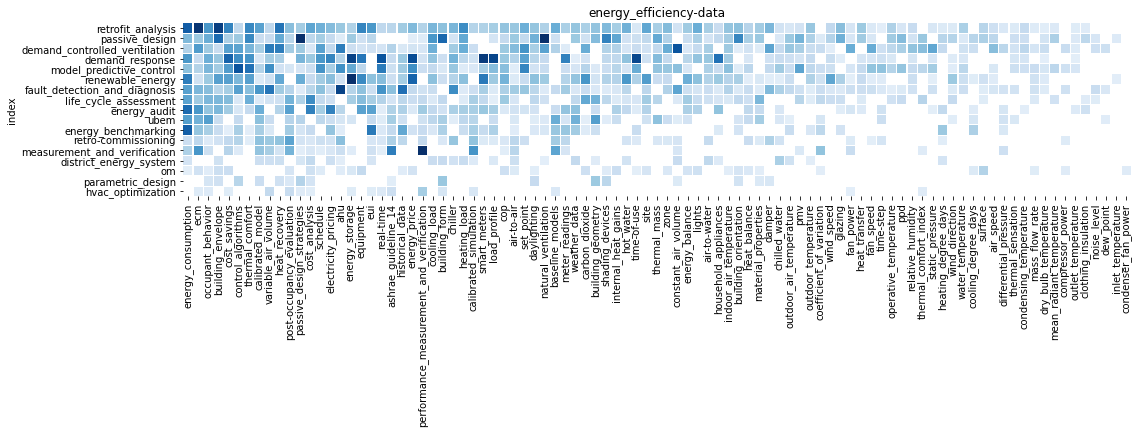

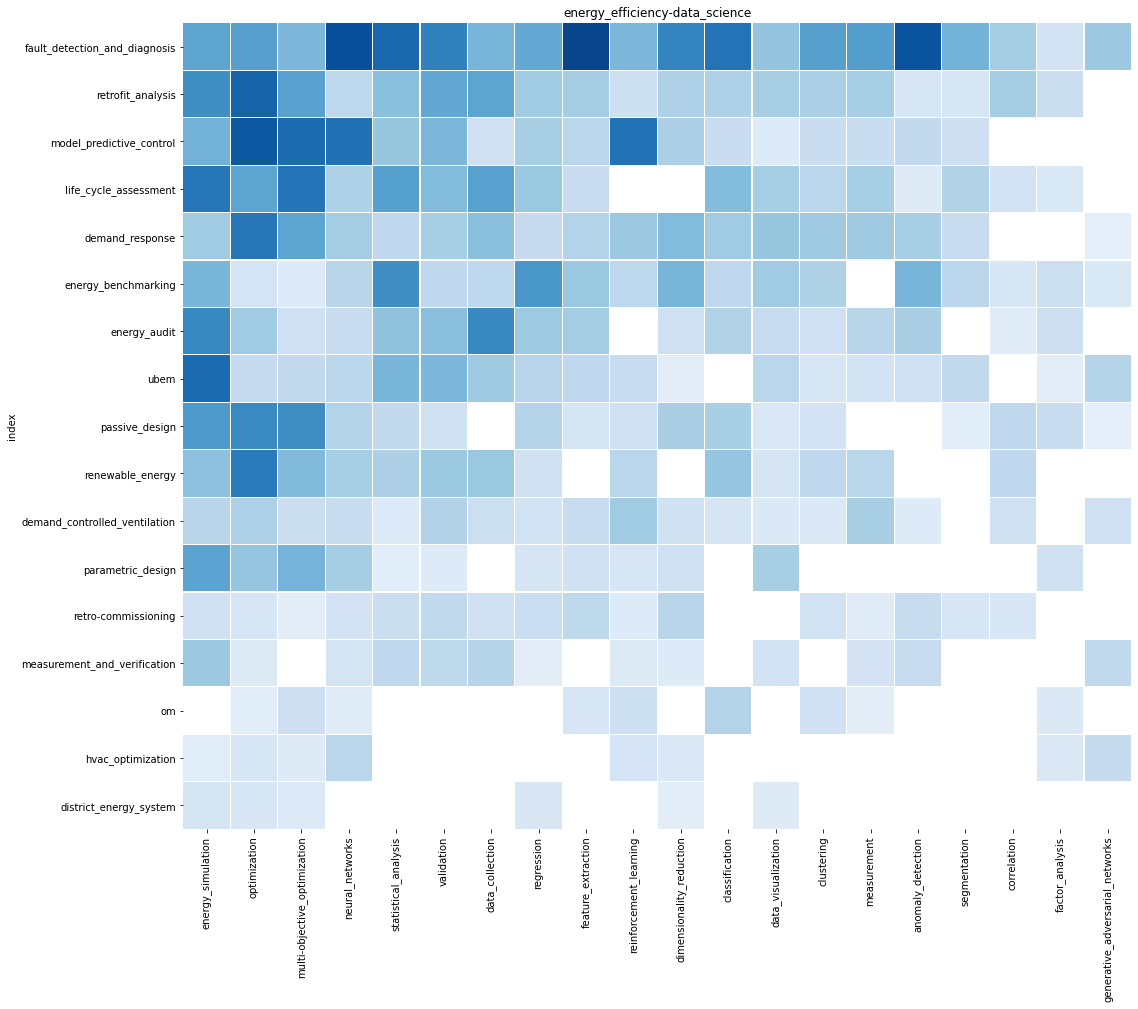

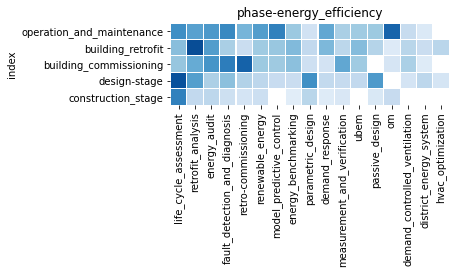

In [117]:
# Usability ranked heatmap plots using N-gram method
# this code also creates a graph network between each pair of words {Wa,Wb, ̄S(Wa,Wb)}which
# is then converted into a directed weighted graph (please refer to article:Section 2.5 )

#1. we initiate the Network Graph
G = nx.Graph()
display(HTML('''<h1>Usability ranked heatmap plots using N-gram method</h1>
                <p> Please refer to Figures 8, 9, and 13 in the article</p>
                <b> Colorbar indicating the range of relations strenght:
                </b><br>0 = very week relation, 1.0 = very strong relation'''))
create_color_bar()
for k2, rel in relations.items():
    table ={}

    for ds in rel[1]:
        graph = [G.add_edge(ds[0], node_, weight=1.0) for node_ in ds]
        d = model.most_similar(ds, topn=1000000)
        this_one = {}

        for j in rel[0]:
            ef_sim = []
            for i in d:
                if i[0] in j:
                    ef_sim.append(i[1])
            this_one[j[0]] = np.max(ef_sim)
        table[ds[0]] = this_one


    table2={}
    for k, v in table.items():
        ut=[]
        for d in rel[0]:
            graph2 = [G.add_edge(d[0], node_2, weight=1.0) for node_2 in d]
            
            try:
                if v[d[0]] > 0.05:
                    ut.append(v[d[0]])
                    G.add_edge(d[0], k, weight = v[d[0]])
                else:
                    ut.append(np.nan)
            except Exception as e:
                print(str(e))
                ut.append(np.nan)
        table2[k] = ut

    table2["index"]=[i[0] for i in rel[0]]

    df = pd.DataFrame(table2)
    df = df.set_index("index")

    df.to_csv("./relations/"+k2+".csv")
    viridis = cm.get_cmap('Blues', 5)
    df_sorted = df.reindex(df.sum().sort_values(ascending=False).index, axis=1)
    df_sorted['sum'] = df_sorted.sum(axis=1)
    plt.figure(figsize=(float(len(rel[0])), float(len(rel[1]))))
    df_sorted = df_sorted.sort_values(by="sum", ascending=False)[df_sorted.columns[:-1]]
    n = 2.2
    plt.title(k2)
    sns.heatmap(df_sorted, 
                cmap="Blues", 
                vmin=0.0, 
                vmax=0.5,
                square=True, 
                annot=False, 
                linewidths=0.1, 
                linecolor="#fff",
               cbar = False,
               )    
    plt.show()

In [34]:
# This line shows the graph network edge weight uncomment to print
# nx.get_edge_attributes(G, 'weight')

# 2. *H*ierarchical *A*gglomerative *C*lustering (HAC) relation extraction

## 2.1 pre-processing words' vectors

In [119]:
#1. preprocessing the words by extracting the embedding vector of each word for visualization
display(HTML('''<b> The following table shows each word, its correstponding 300 dimension vector, and its category</b>'''))
vec = []
dfdict = {}
for i in range(301):
    if i ==0:
        dfdict["word"]=[]
    else:
        dfdict[i]=[]
dfdict    
for i in list(G.nodes):
    dfdict["word"].append(i)
    thisvec = list(model.get_vector(i))

    for ix in range(300):
        dfdict[ix+1].append(thisvec[ix])
    
embd = pd.DataFrame(dfdict).set_index("word")
embd.to_csv("../data/embedding_matrix.tsv", sep="\t", index = False)

def return_type(x):
    categories = {
        "energy_efficiency":energy_efficiency,
        "data": data,
        "phase":phase,
        "data_science": data_science
    }
#     print(x)
    for k , v in categories.items():
        for i in v:
            if x in i:
                return k
        
embd = embd.reset_index()
embd["category"] = embd["word"].apply(lambda x : return_type(x))
embd = embd.set_index("word")
embd

1         2         3         4         5  \
word                                                                         
design-stage             -0.322568  0.104781  0.036454 -0.255697  0.493182   
early_design_stage        0.001449 -0.387012 -0.402136  0.032318  0.414472   
early_design_stages       0.098660 -0.209140 -0.271769  0.140258 -0.201713   
preliminary_design       -0.318248 -0.249270 -0.960602 -0.459950  0.504639   
conceptual_design        -0.187088 -0.429315 -0.296109  0.095553  0.276175   
...                            ...       ...       ...       ...       ...   
renewable_energy          0.204305  0.014916  0.174227 -0.518876  0.460083   
renewable_energy_sources  0.433846 -0.055452  0.187996 -0.301833  0.816722   
renewable_energies        0.241465 -0.053643  0.244826 -0.225630  0.430969   
retrofit_analysis         0.331051 -0.032961 -0.605100 -0.126174 -0.376639   
retrofit                  0.177045 -0.314145 -0.821880  0.150196  0.258024   

                                 6         7         8         9        10  \
word                                                                         
design-stage             -0.241817 -0.021194 -0.241614  0.260088 -0.352480   
early_design_stage        0.280829  0.304432 -0.233352  0.154359 -0.119303   
early_design_stages       0.285438  0.032982 -0.193227 -0.235240 -0.200103   
preliminary_design       -0.010583  0.113519 -0.146093  0.035093 -0.204007   
conceptual_design         0.147419 -0.372668  0.022738 -0.188321 -0.074895   
...                            ...       ...       ...       ...       ...   
renewable_energy         -0.073777  0.178379  0.480103 -0.467000  0.124196   
renewable_energy_sources  0.019208  0.044111  0.421807 -0.525671 -0.162017   
renewable_energies        0.061600 -0.231823  0.462700 -0.398374  0.242283   
retrofit_analysis        -0.452530  0.190053  0.089423 -0.151326  0.653826   
retrofit                  0.135990  0.309135 -0.370818 -0.628274  0.194525   

                          ...       292       293       294       295  \
word                      ...                                           
design-stage              ... -0.409934 -0.282481  0.317089 -0.632490   
early_design_stage        ...  0.024363 -0.122813  0.166838  0.134083   
early_design_stages       ... -0.201684 -0.389284  0.548489 -0.317339   
preliminary_design        ... -0.243175  0.124186 -0.135362  0.088989   
conceptual_design         ...  0.296652  0.234282  0.092138 -0.062296   
...                       ...       ...       ...       ...       ...   
renewable_energy          ...  0.413512 -0.395514  0.577652  0.178264   
renewable_energy_sources  ...  0.056132 -0.585095  0.512937  0.185758   
renewable_energies        ...  0.173130 -0.268976  0.099595 -0.029337   
retrofit_analysis         ... -0.152423 -0.555797  0.263115  0.369394   
retrofit                  ...  0.193435 -0.250826  0.179028  0.188650   

                               296       297       298       299       300  \
word                                                                         
design-stage             -0.158365 -0.150830 -0.338177 -0.382261  0.090054   
early_design_stage       -0.236847 -0.309730 -0.380219  0.160463  0.654255   
early_design_stages       0.259637 -0.803772 -0.411881 -0.064634  0.397244   
preliminary_design       -0.002512 -0.151592 -0.556333 -0.325383 -0.051770   
conceptual_design         0.192842 -0.316849 -0.544774 -0.167959  0.105403   
...                            ...       ...       ...       ...       ...   
renewable_energy         -0.342202  0.044650  0.363527 -0.514349 -0.031873   
renewable_energy_sources -0.282522 -0.125129  0.567863 -0.452717  0.032715   
renewable_energies       -0.324665  0.236657  0.208386 -0.449203  0.118170   
retrofit_analysis        -0.254472 -0.257776 -0.321086 -0.155522  0.252834   
retrofit                 -0.269803 -0.156387 -0.527318 -0.266193  0.107117   

                                   cat

In [38]:
embd.reset_index()[["word", "category"]].to_csv("../data/labels.tsv", sep="\t", index=False)

## 2.2 Heirarchical Clustereing (HAC) and Correlation Matrices

In [41]:
#load all the realtion_dataframes

files = os.listdir("./relations/")
all_dfs = {}
for f in files:
    if ".csv" in f:
        all_dfs[f.replace(".csv", "")]=(pd.read_csv("./relations/"+f))

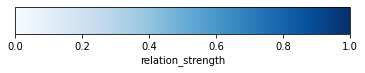

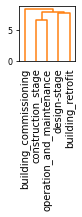

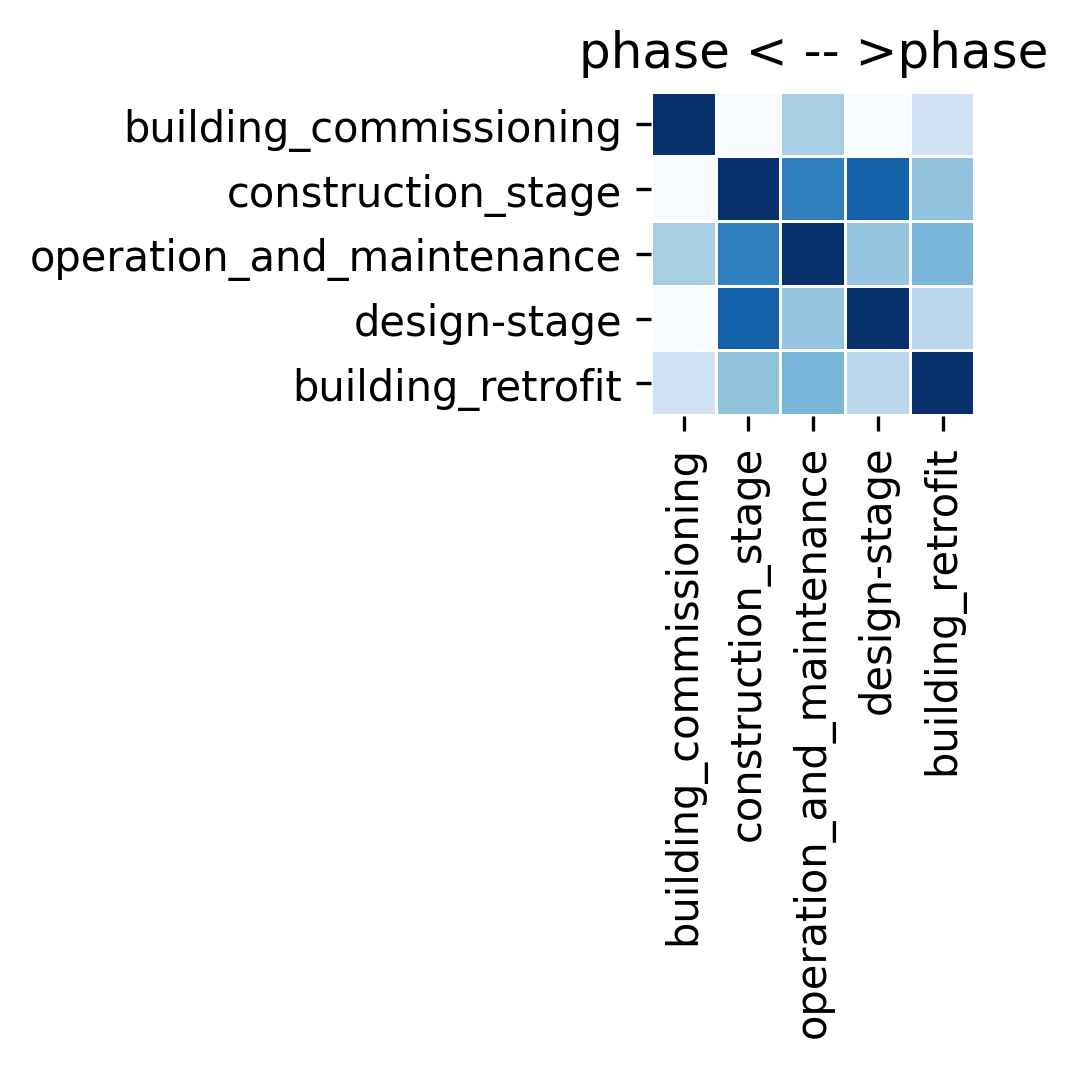

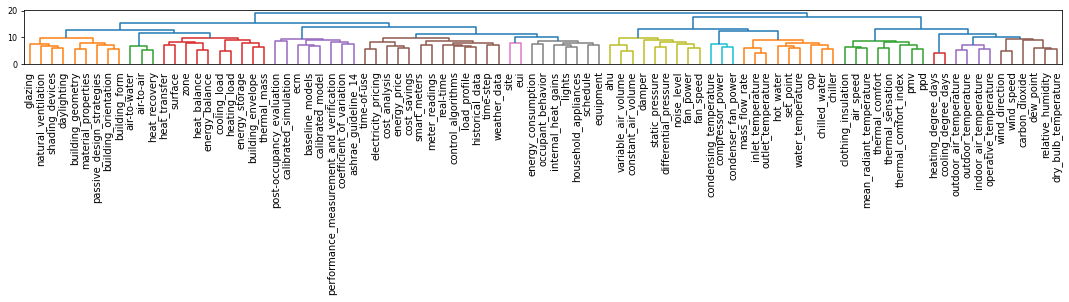

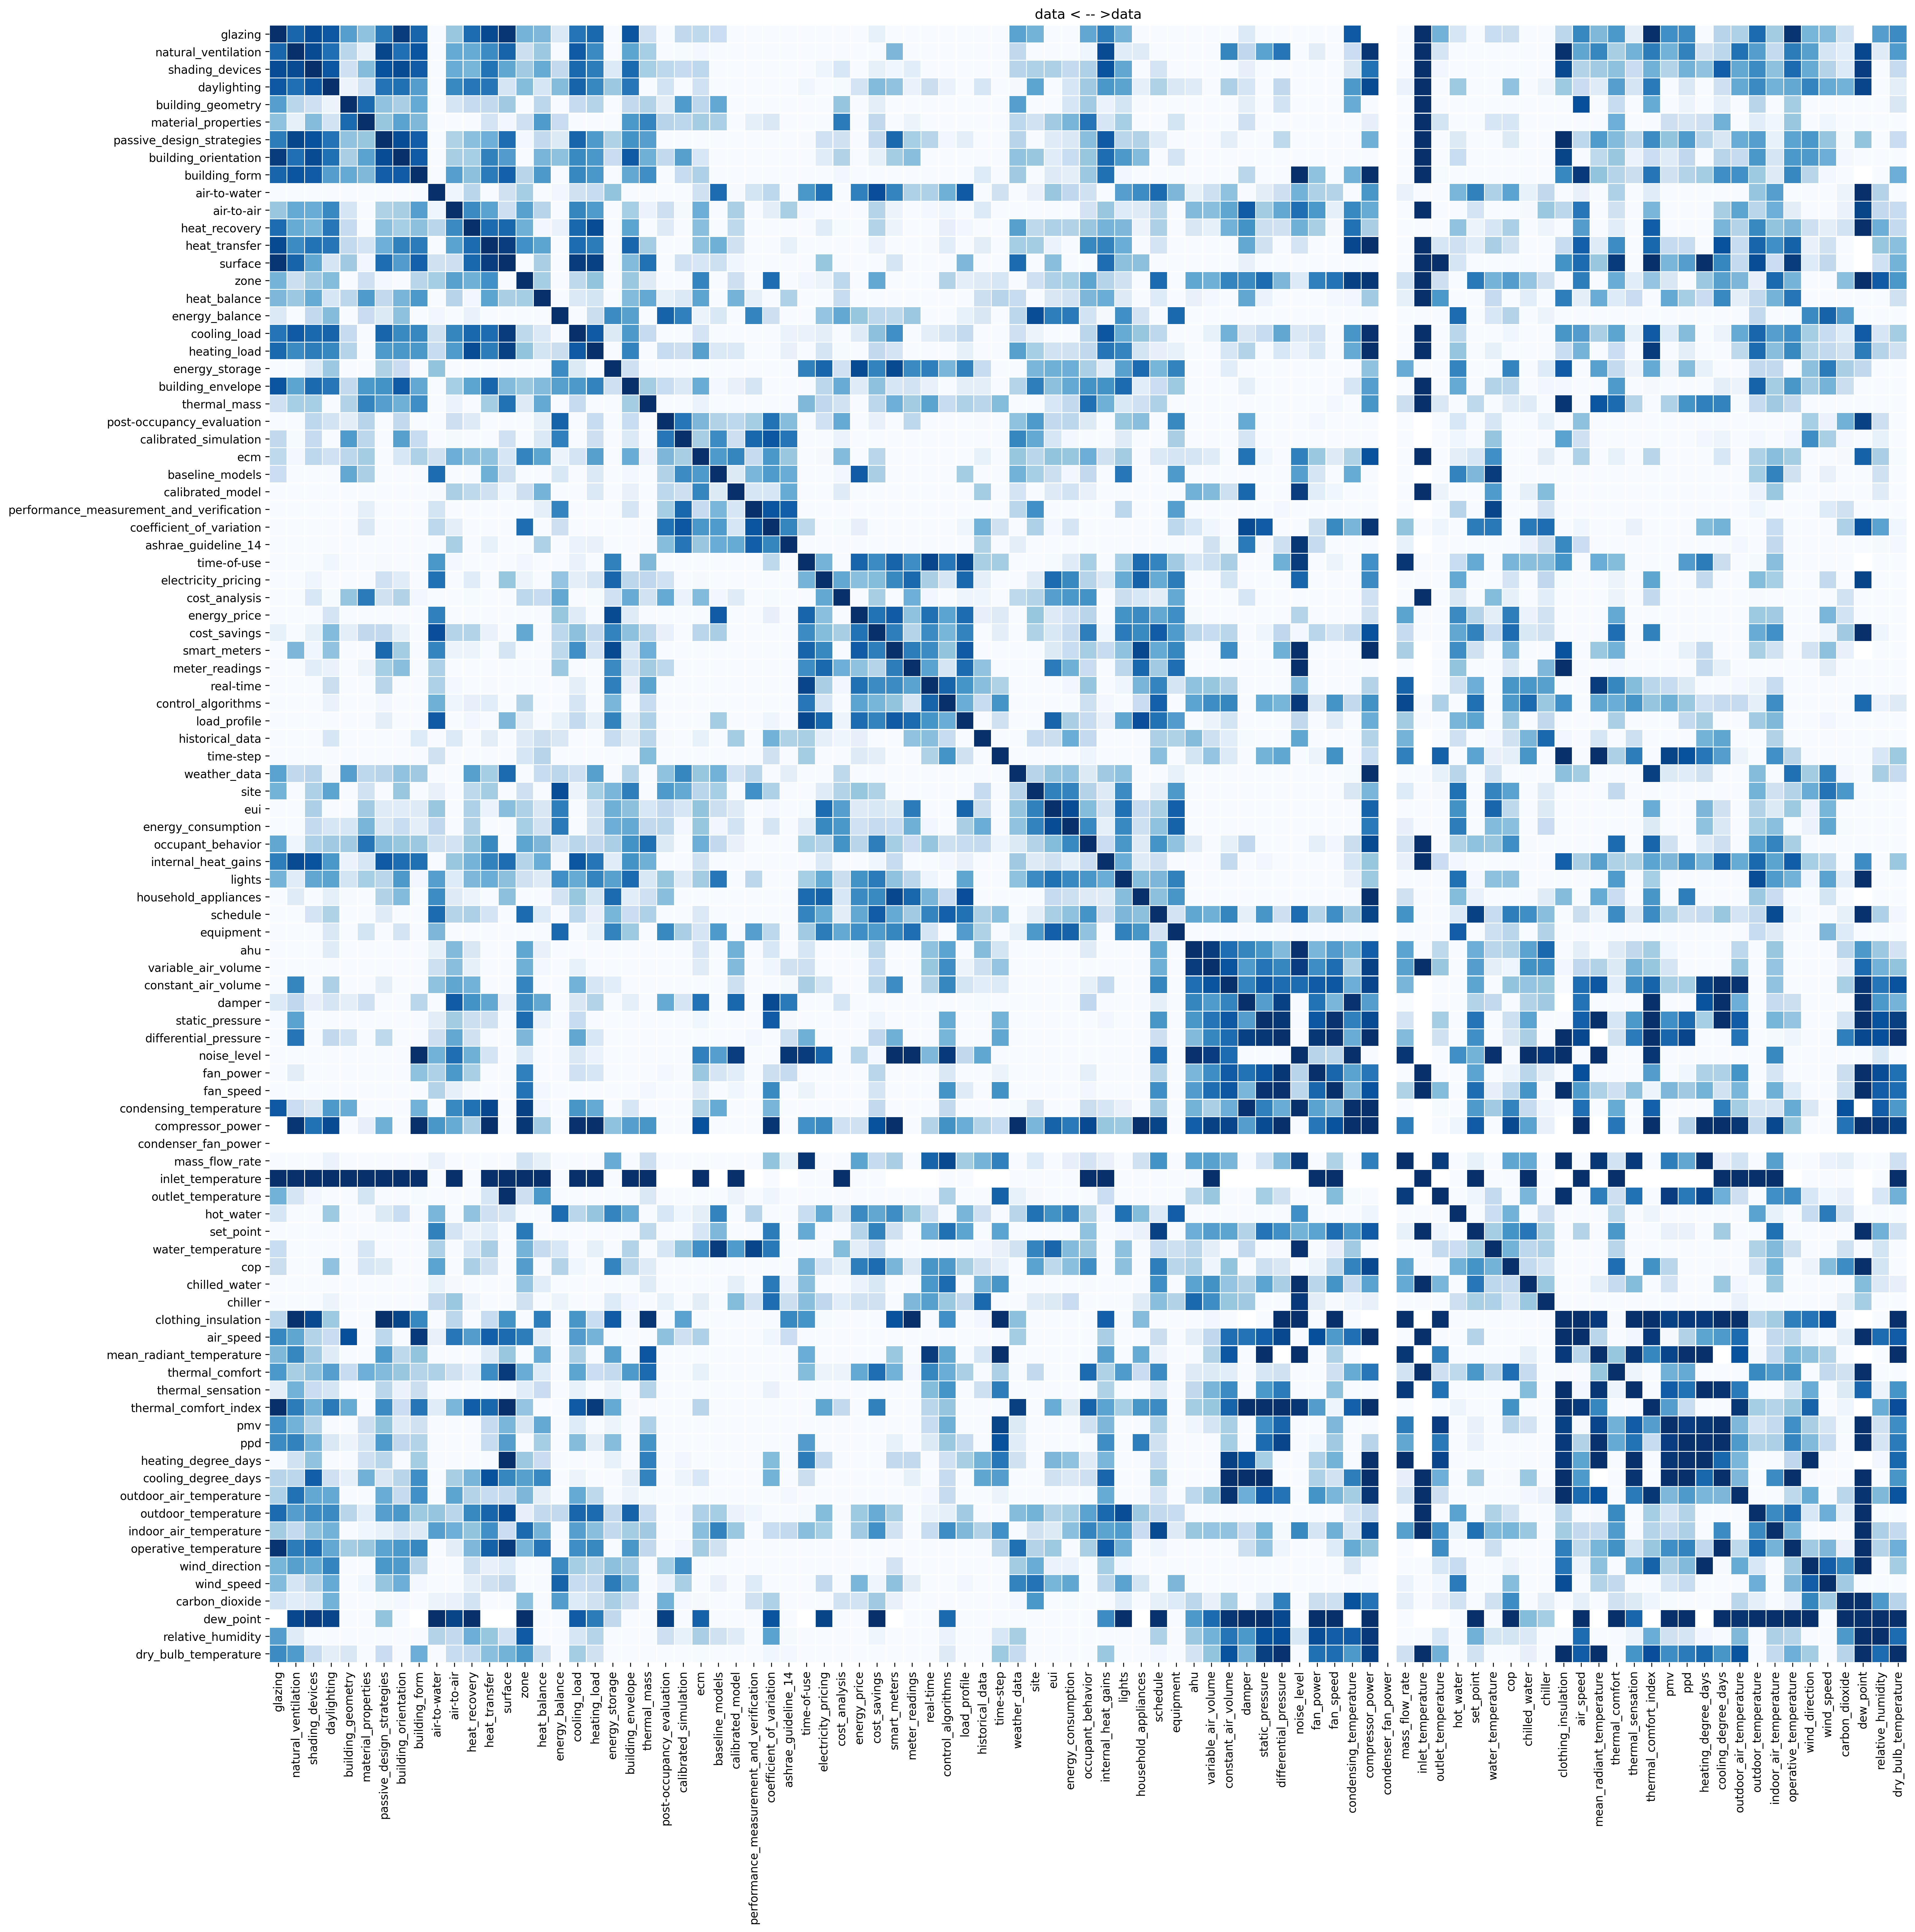

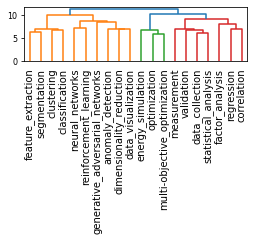

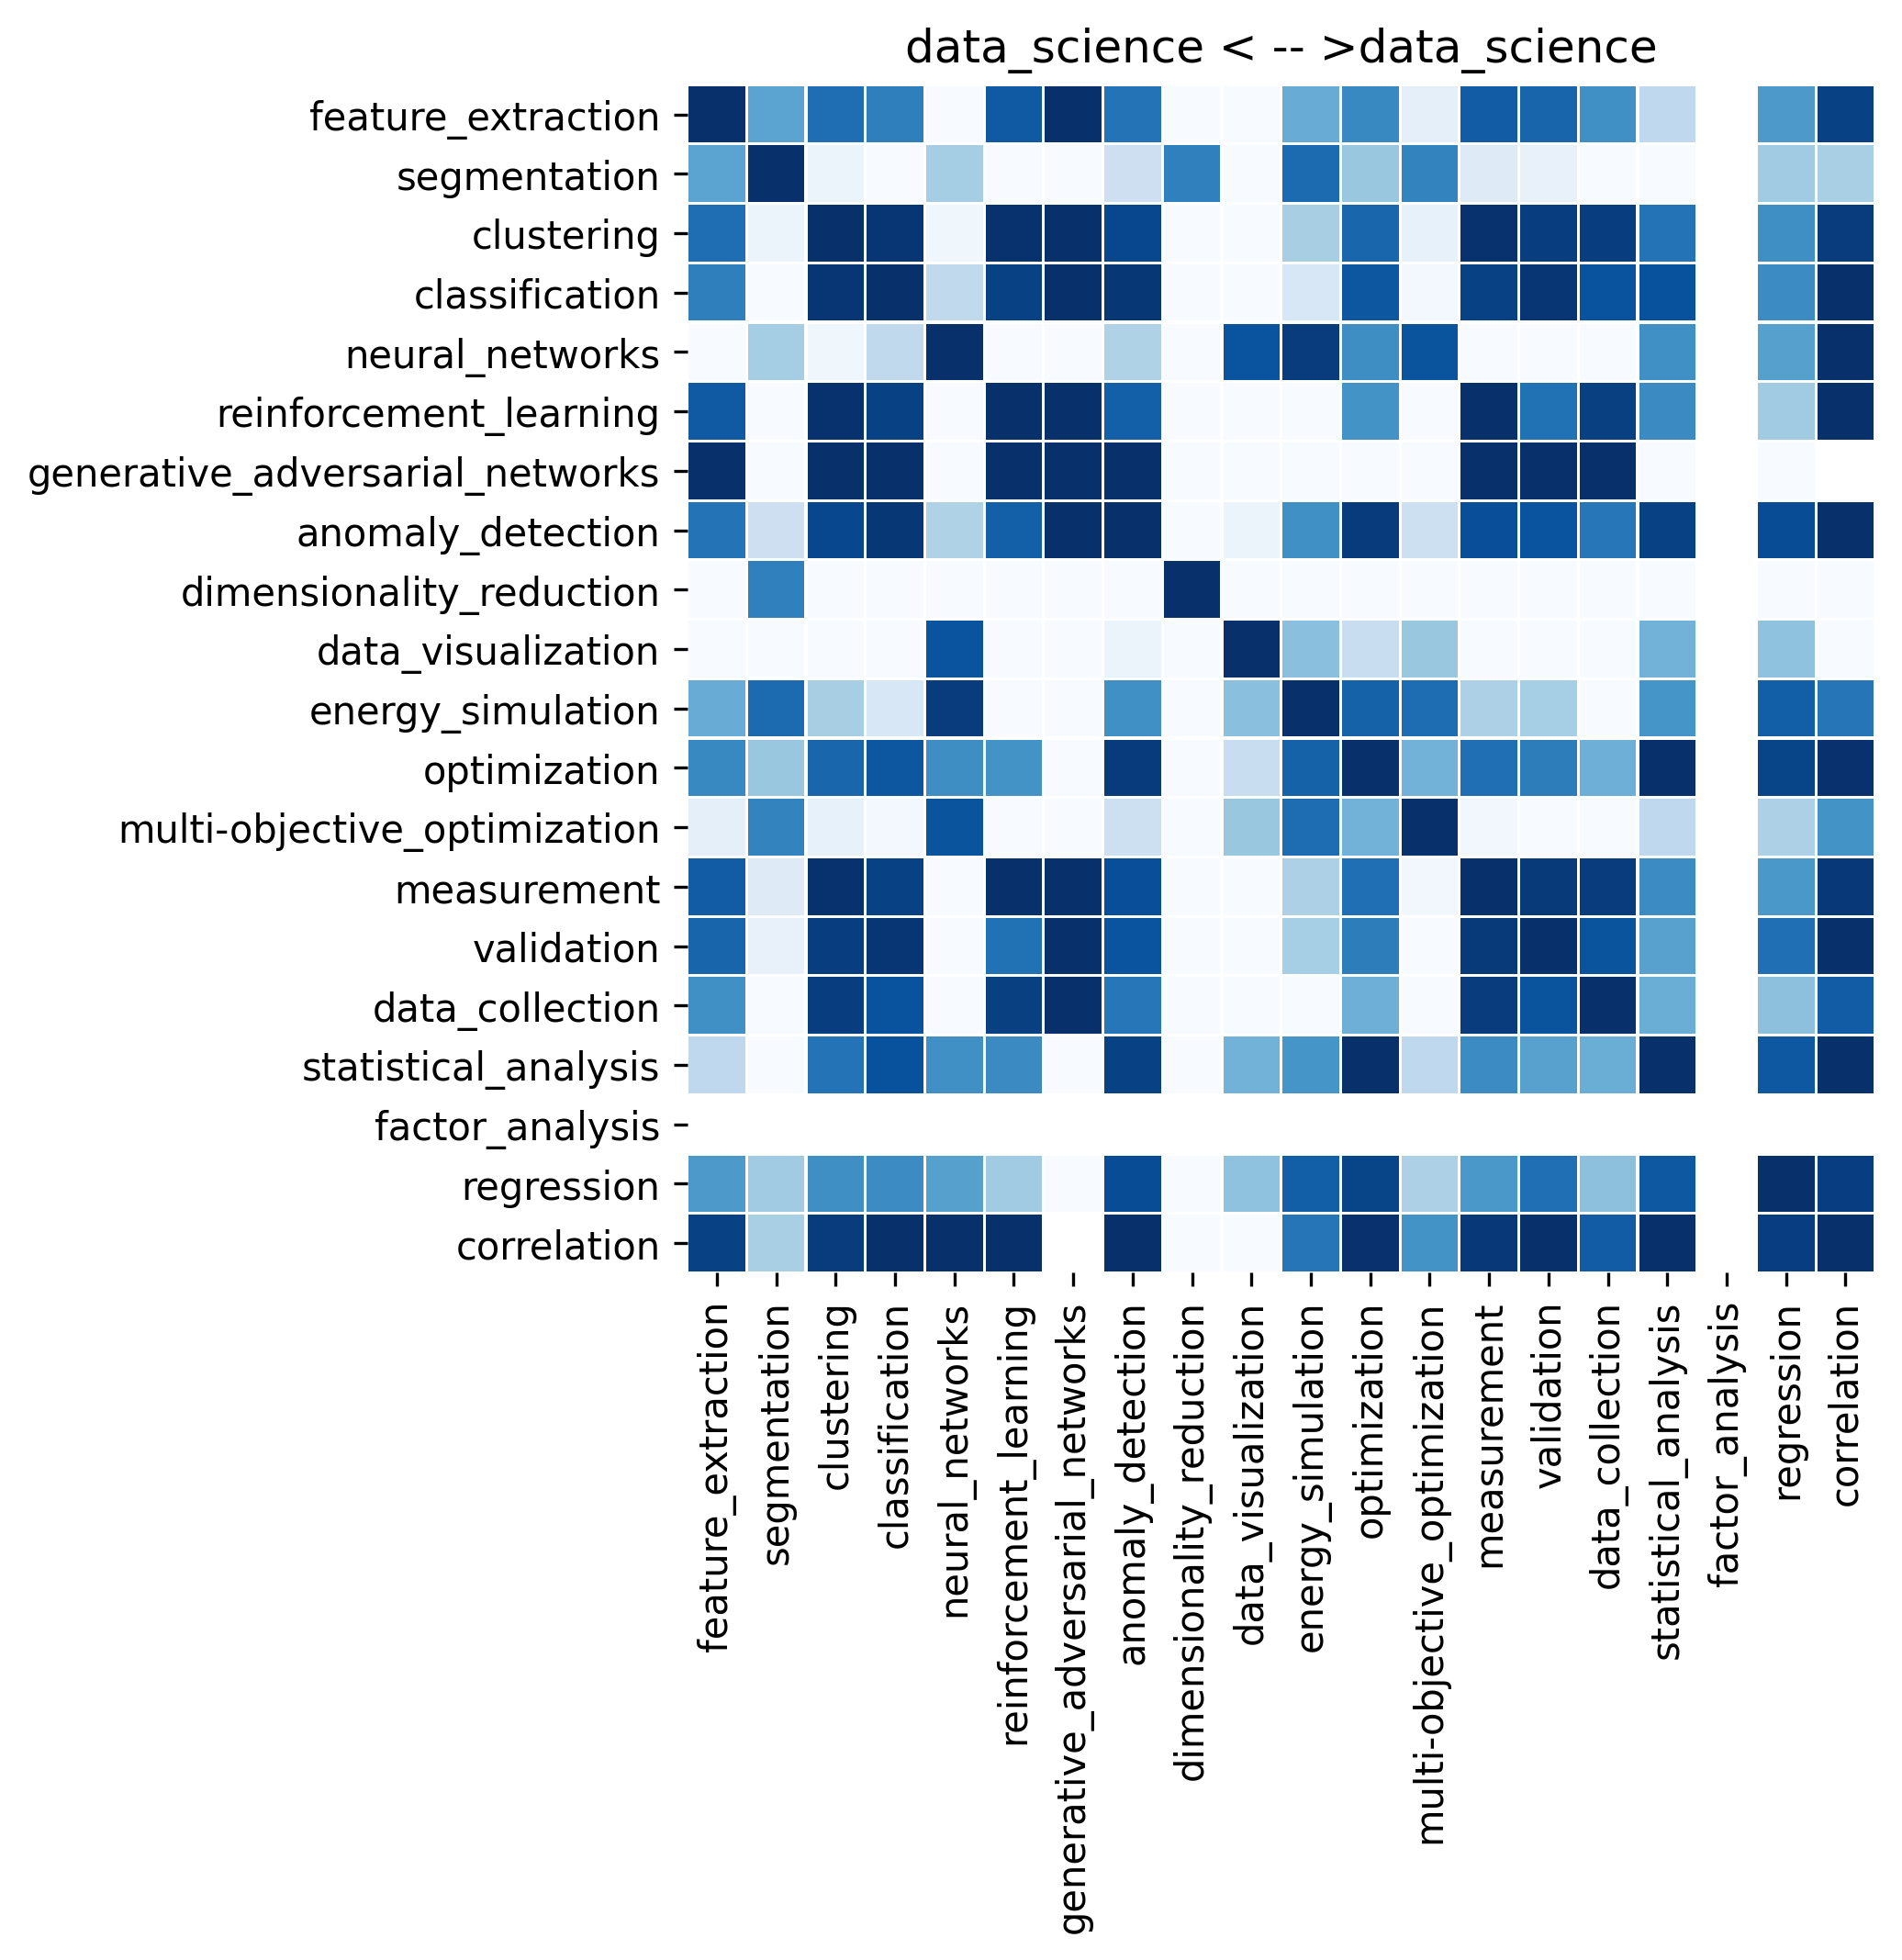

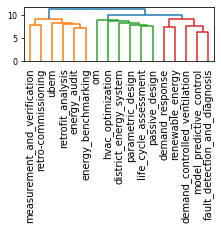

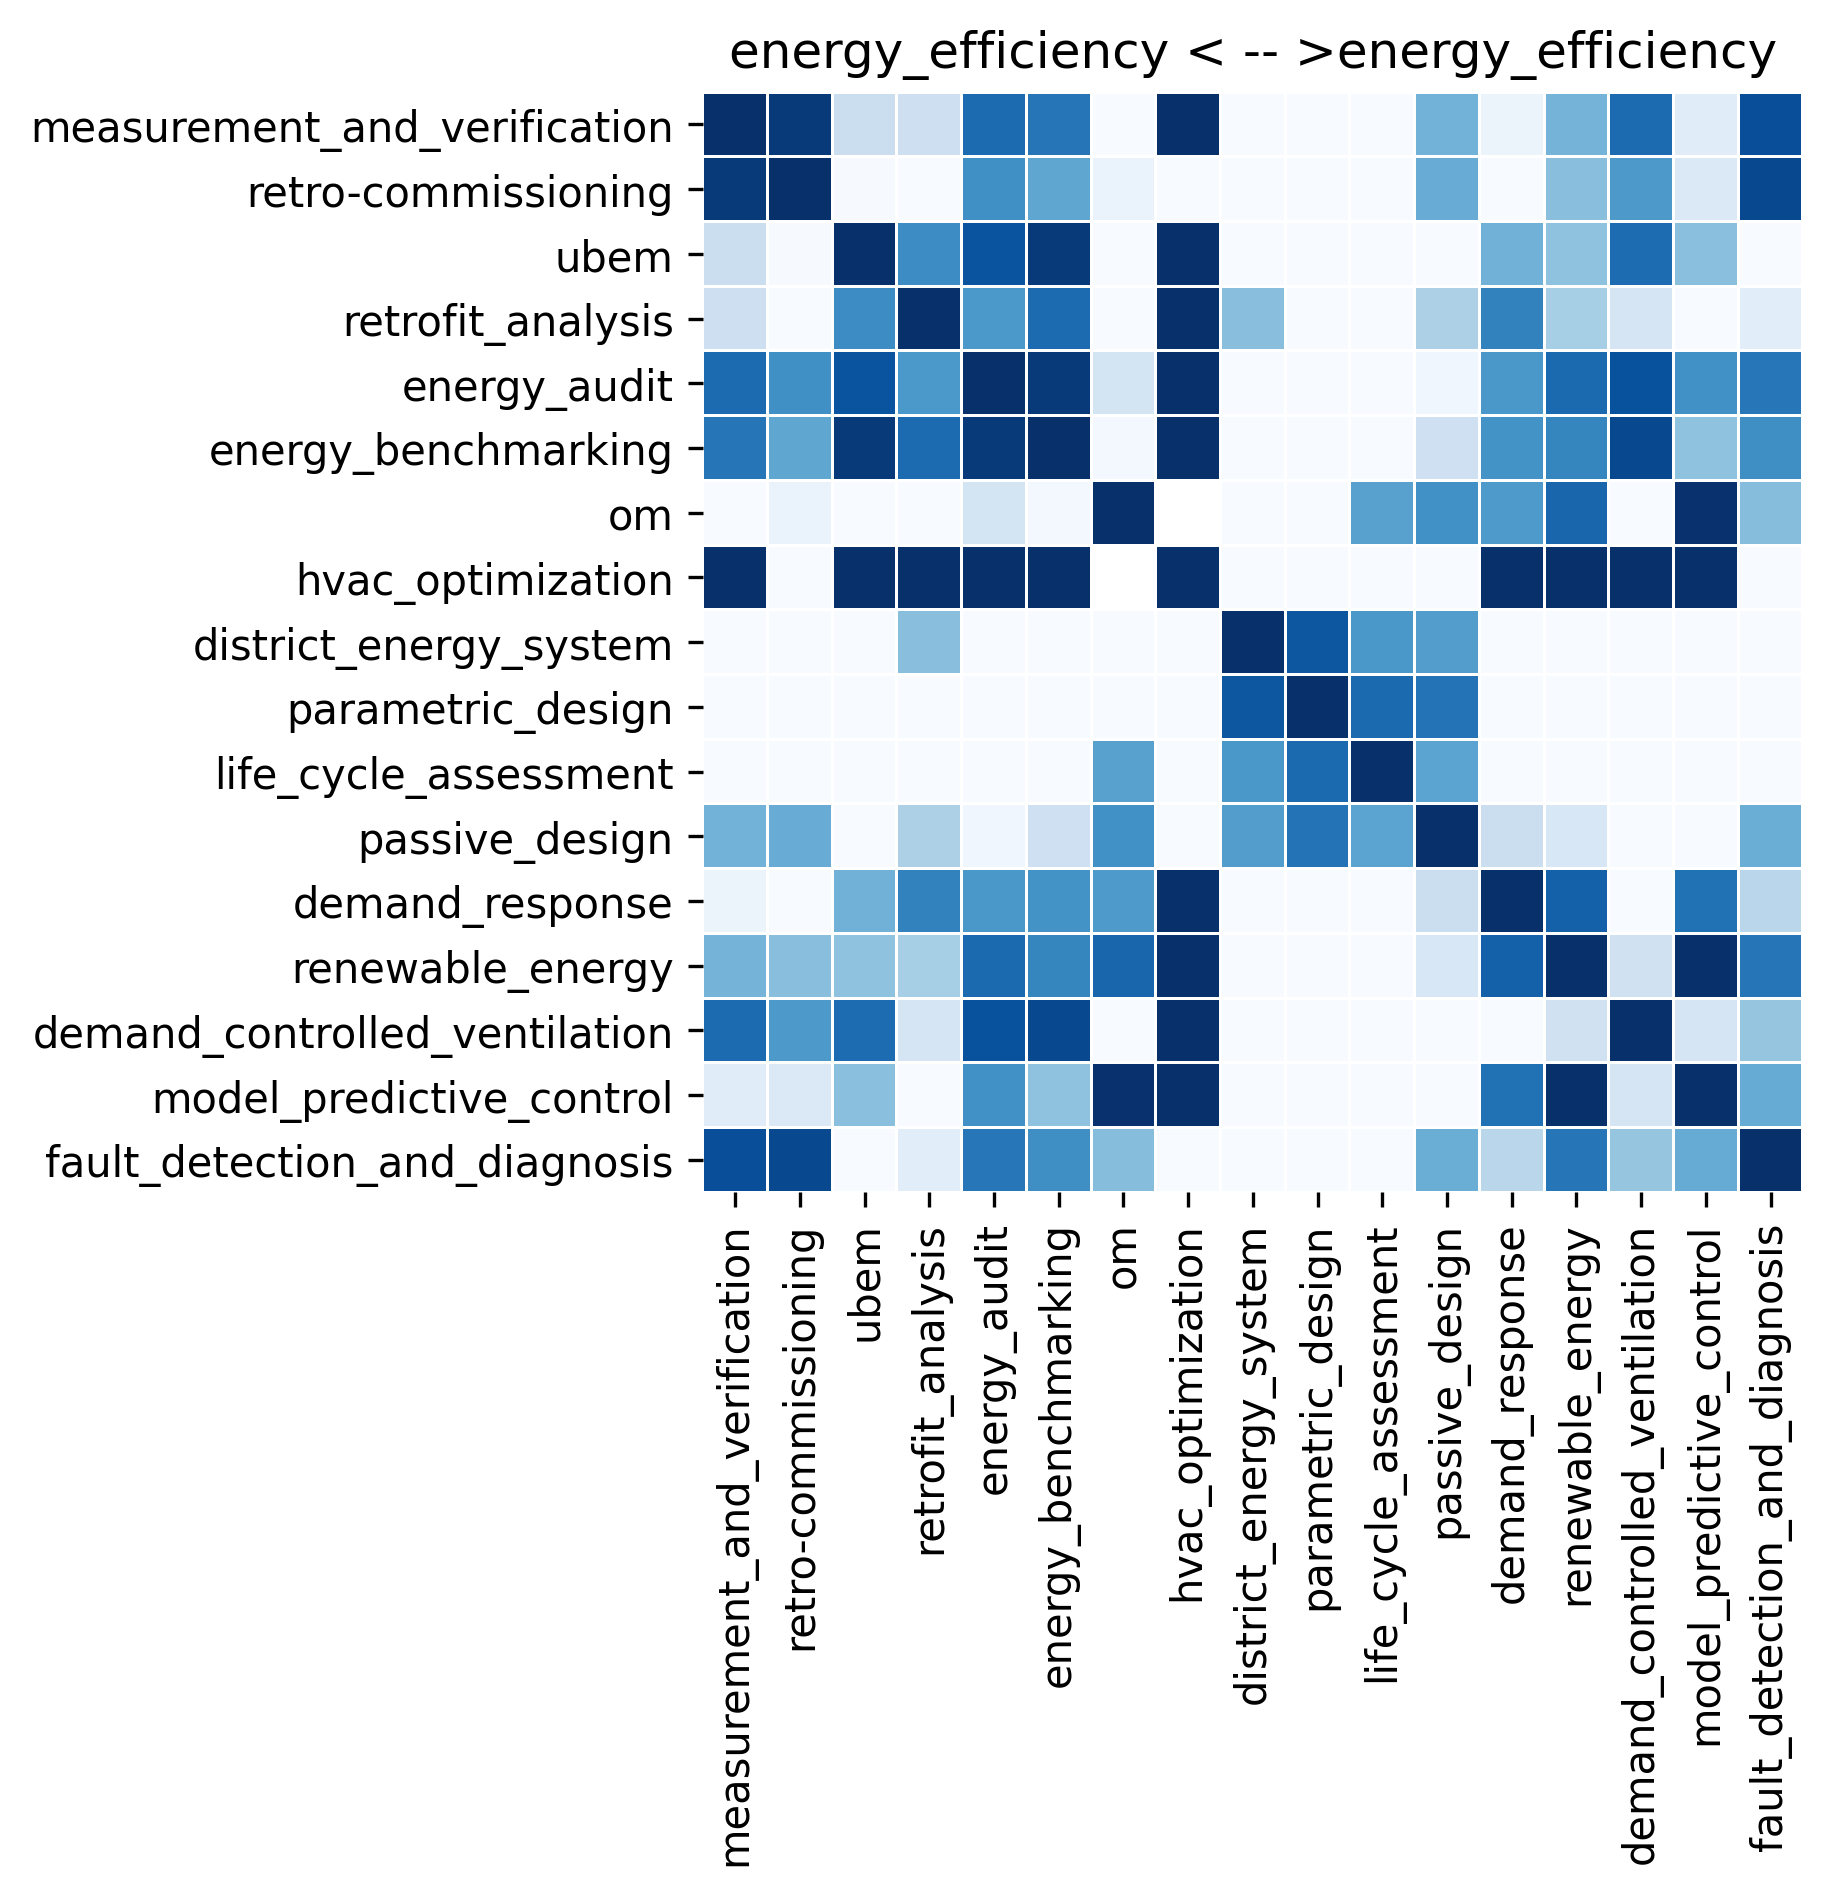

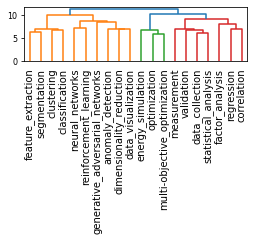

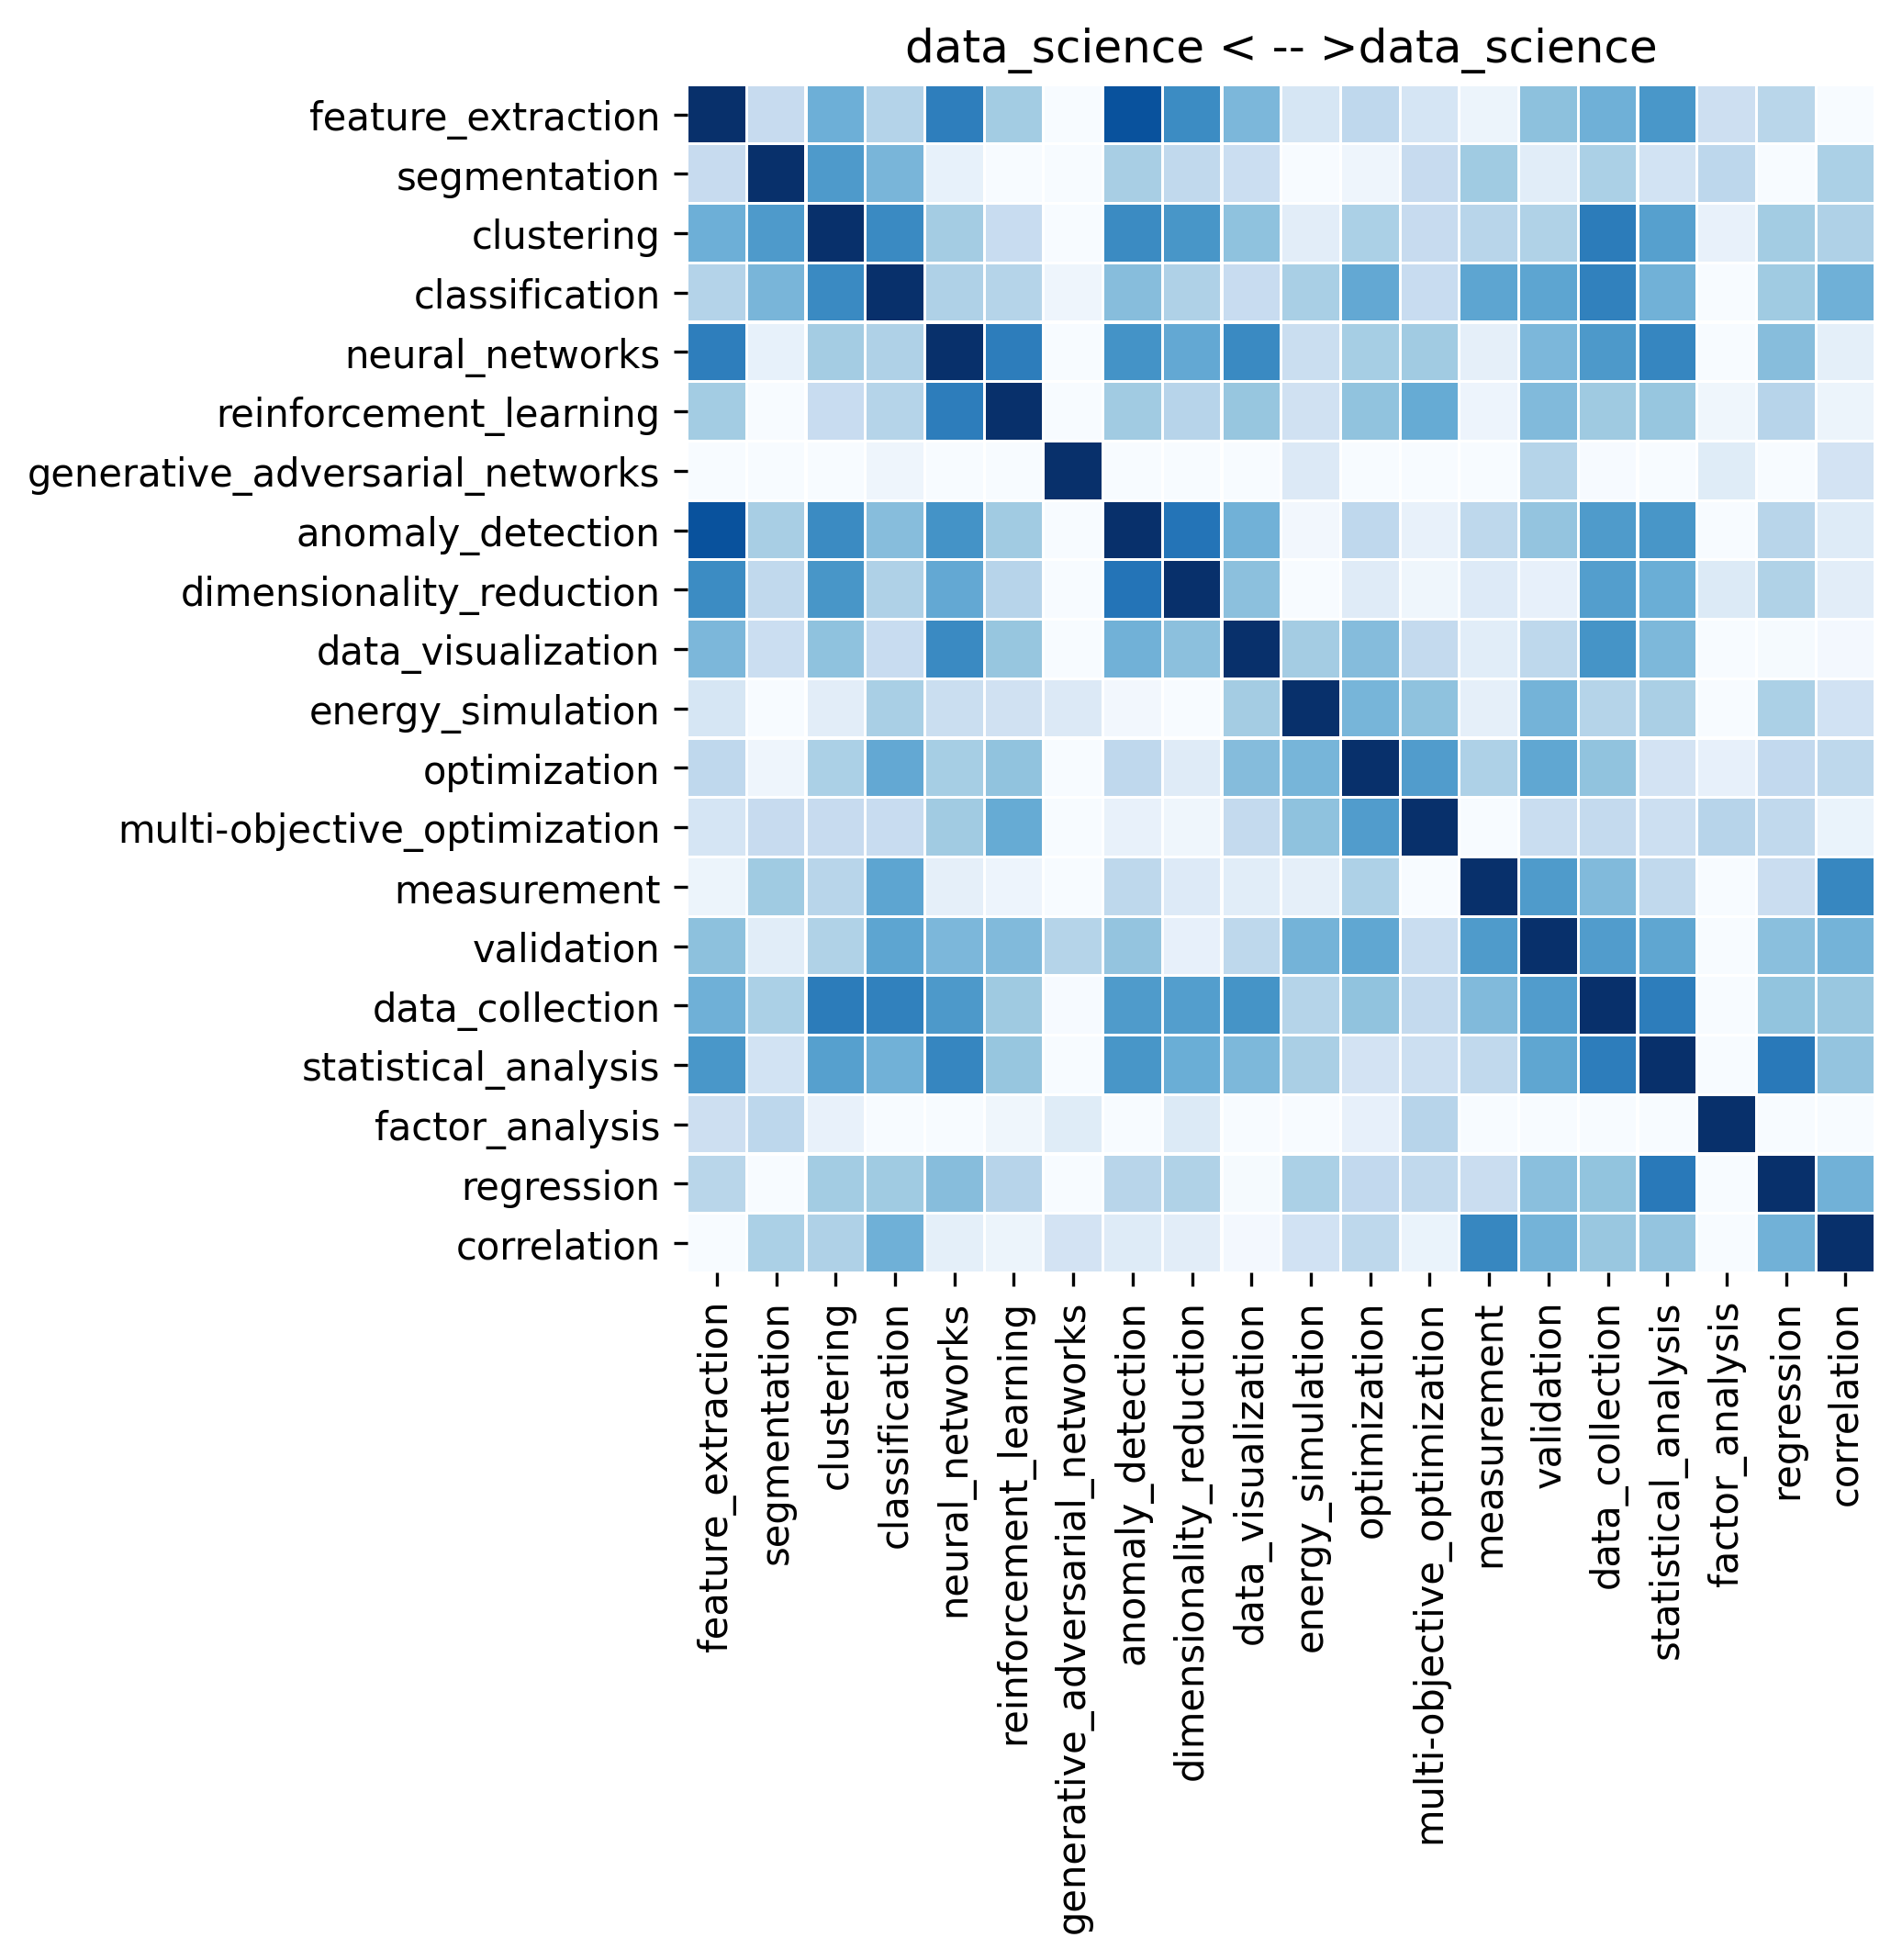

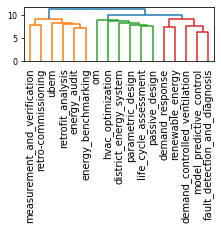

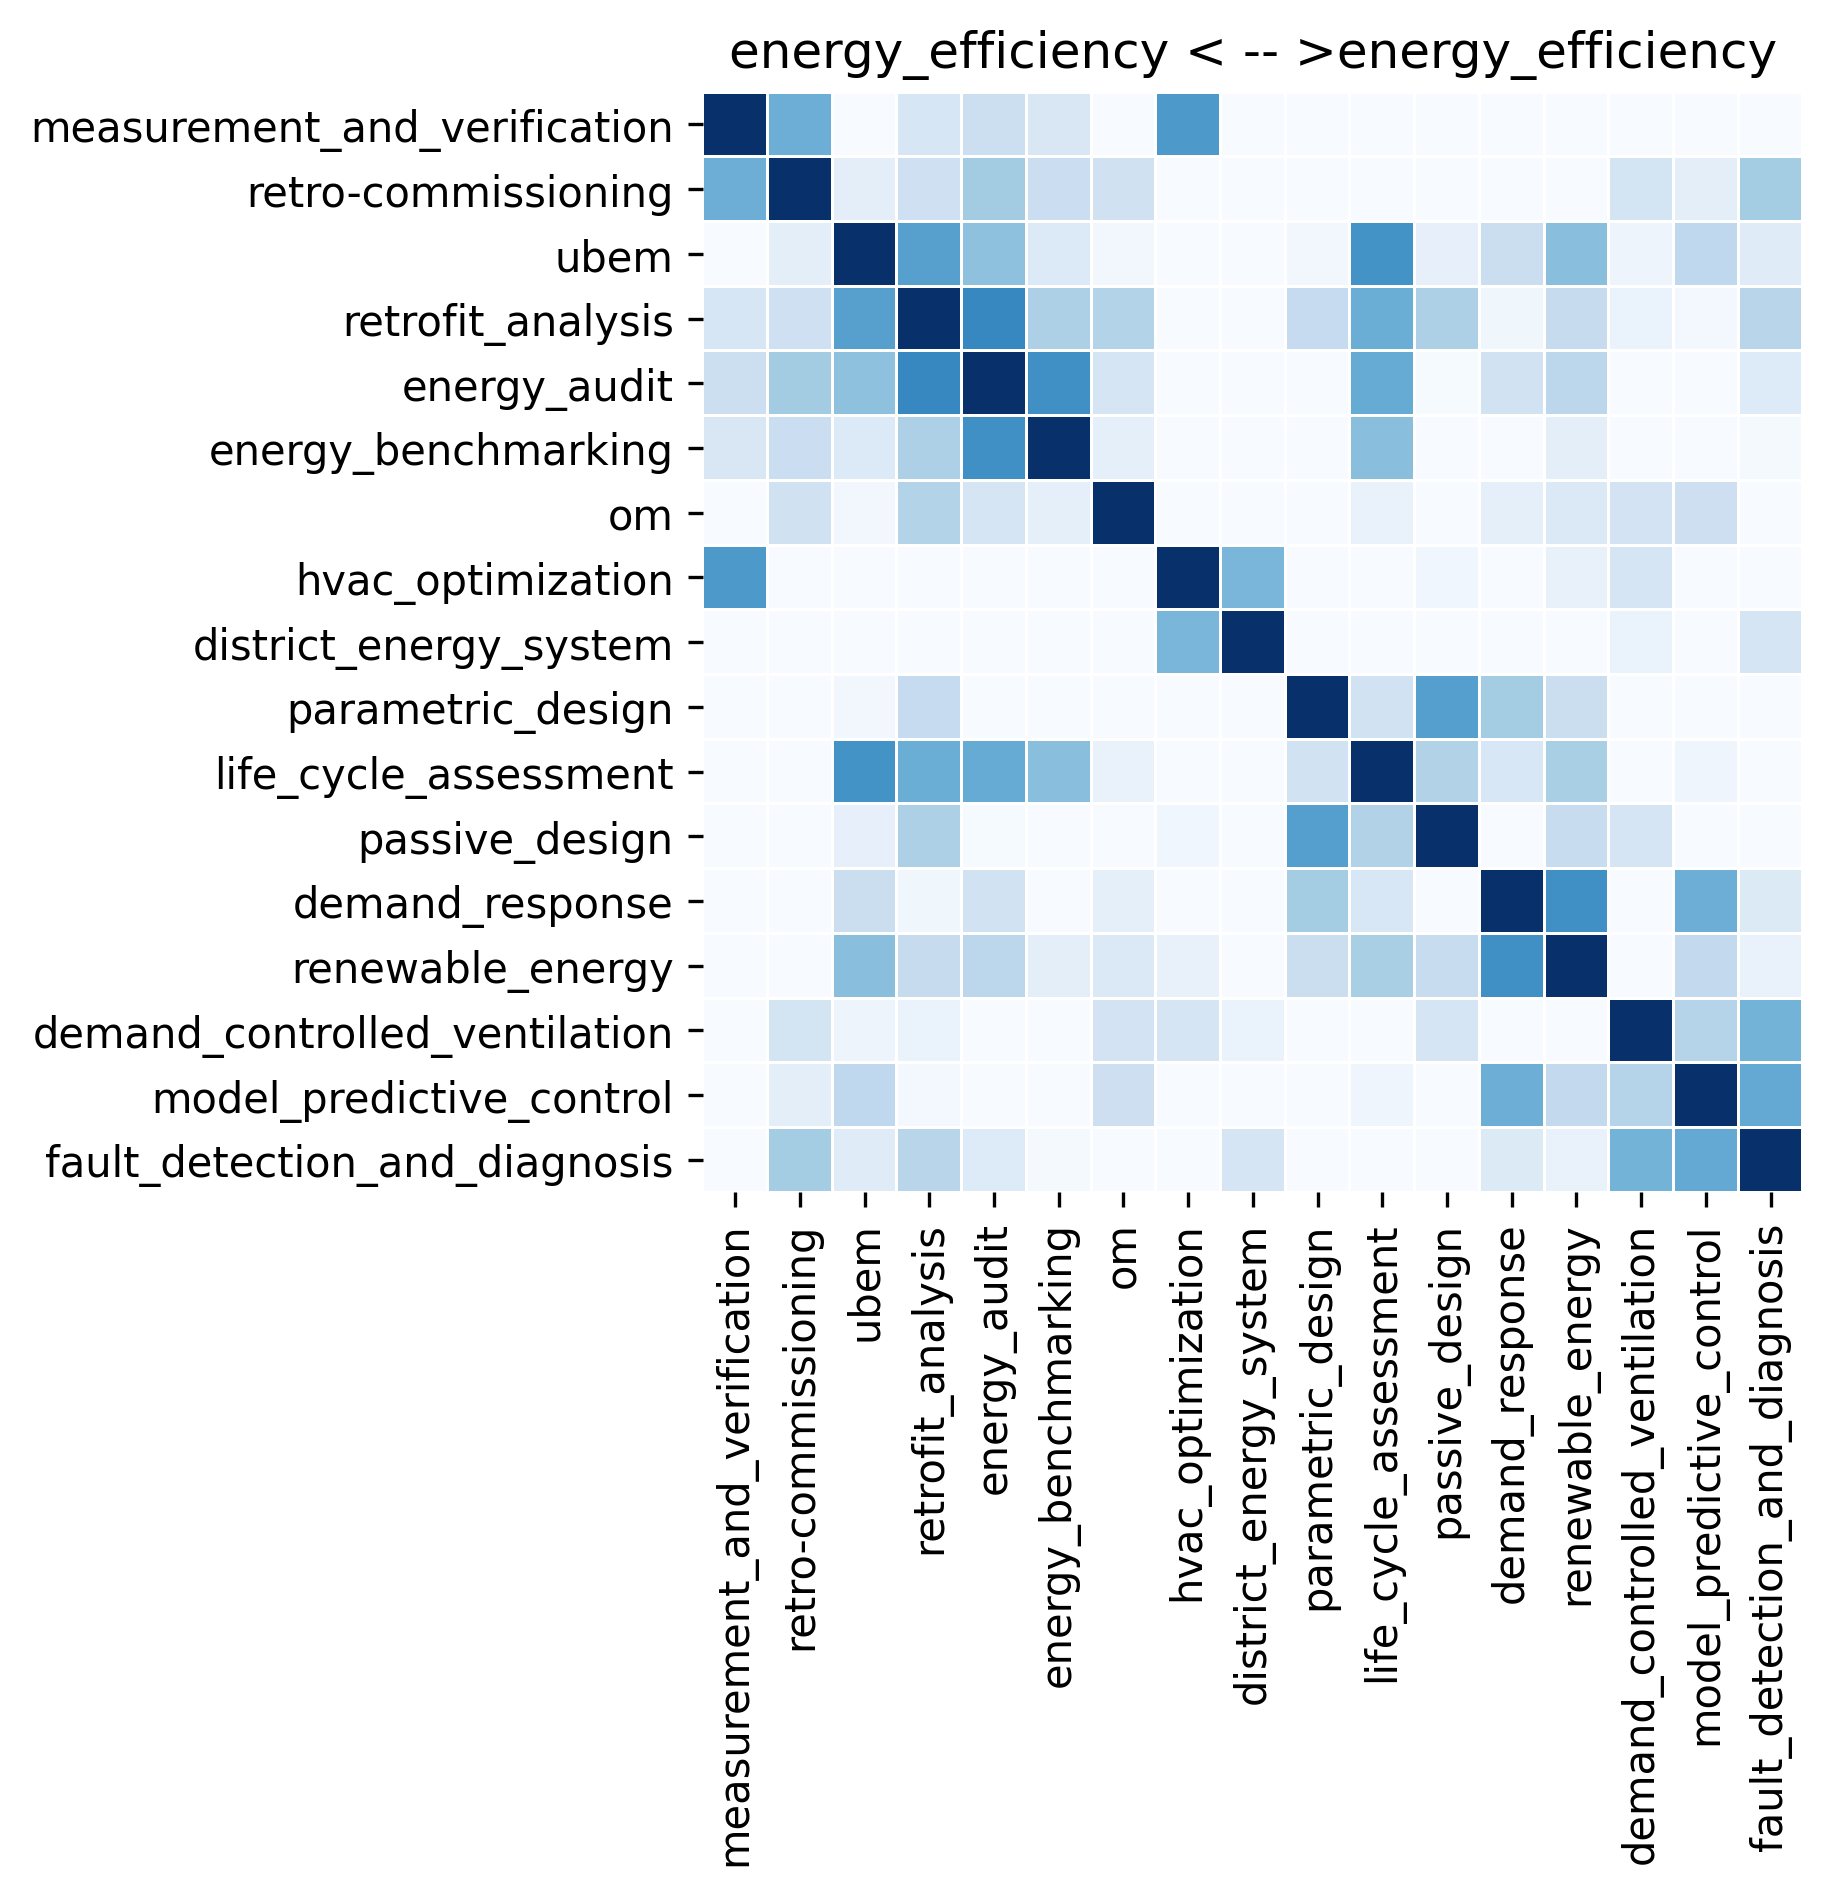

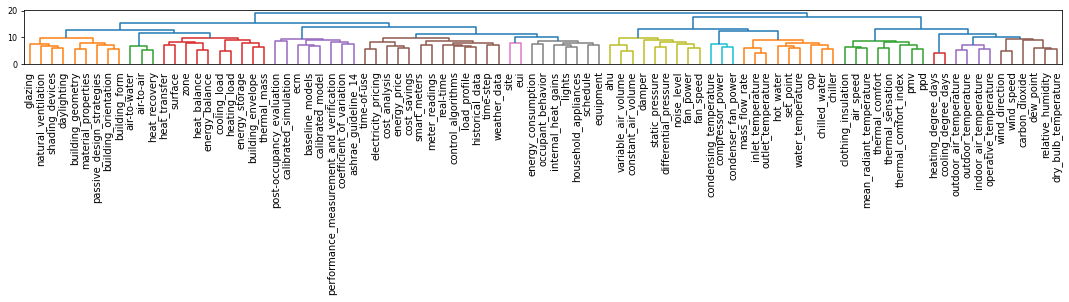

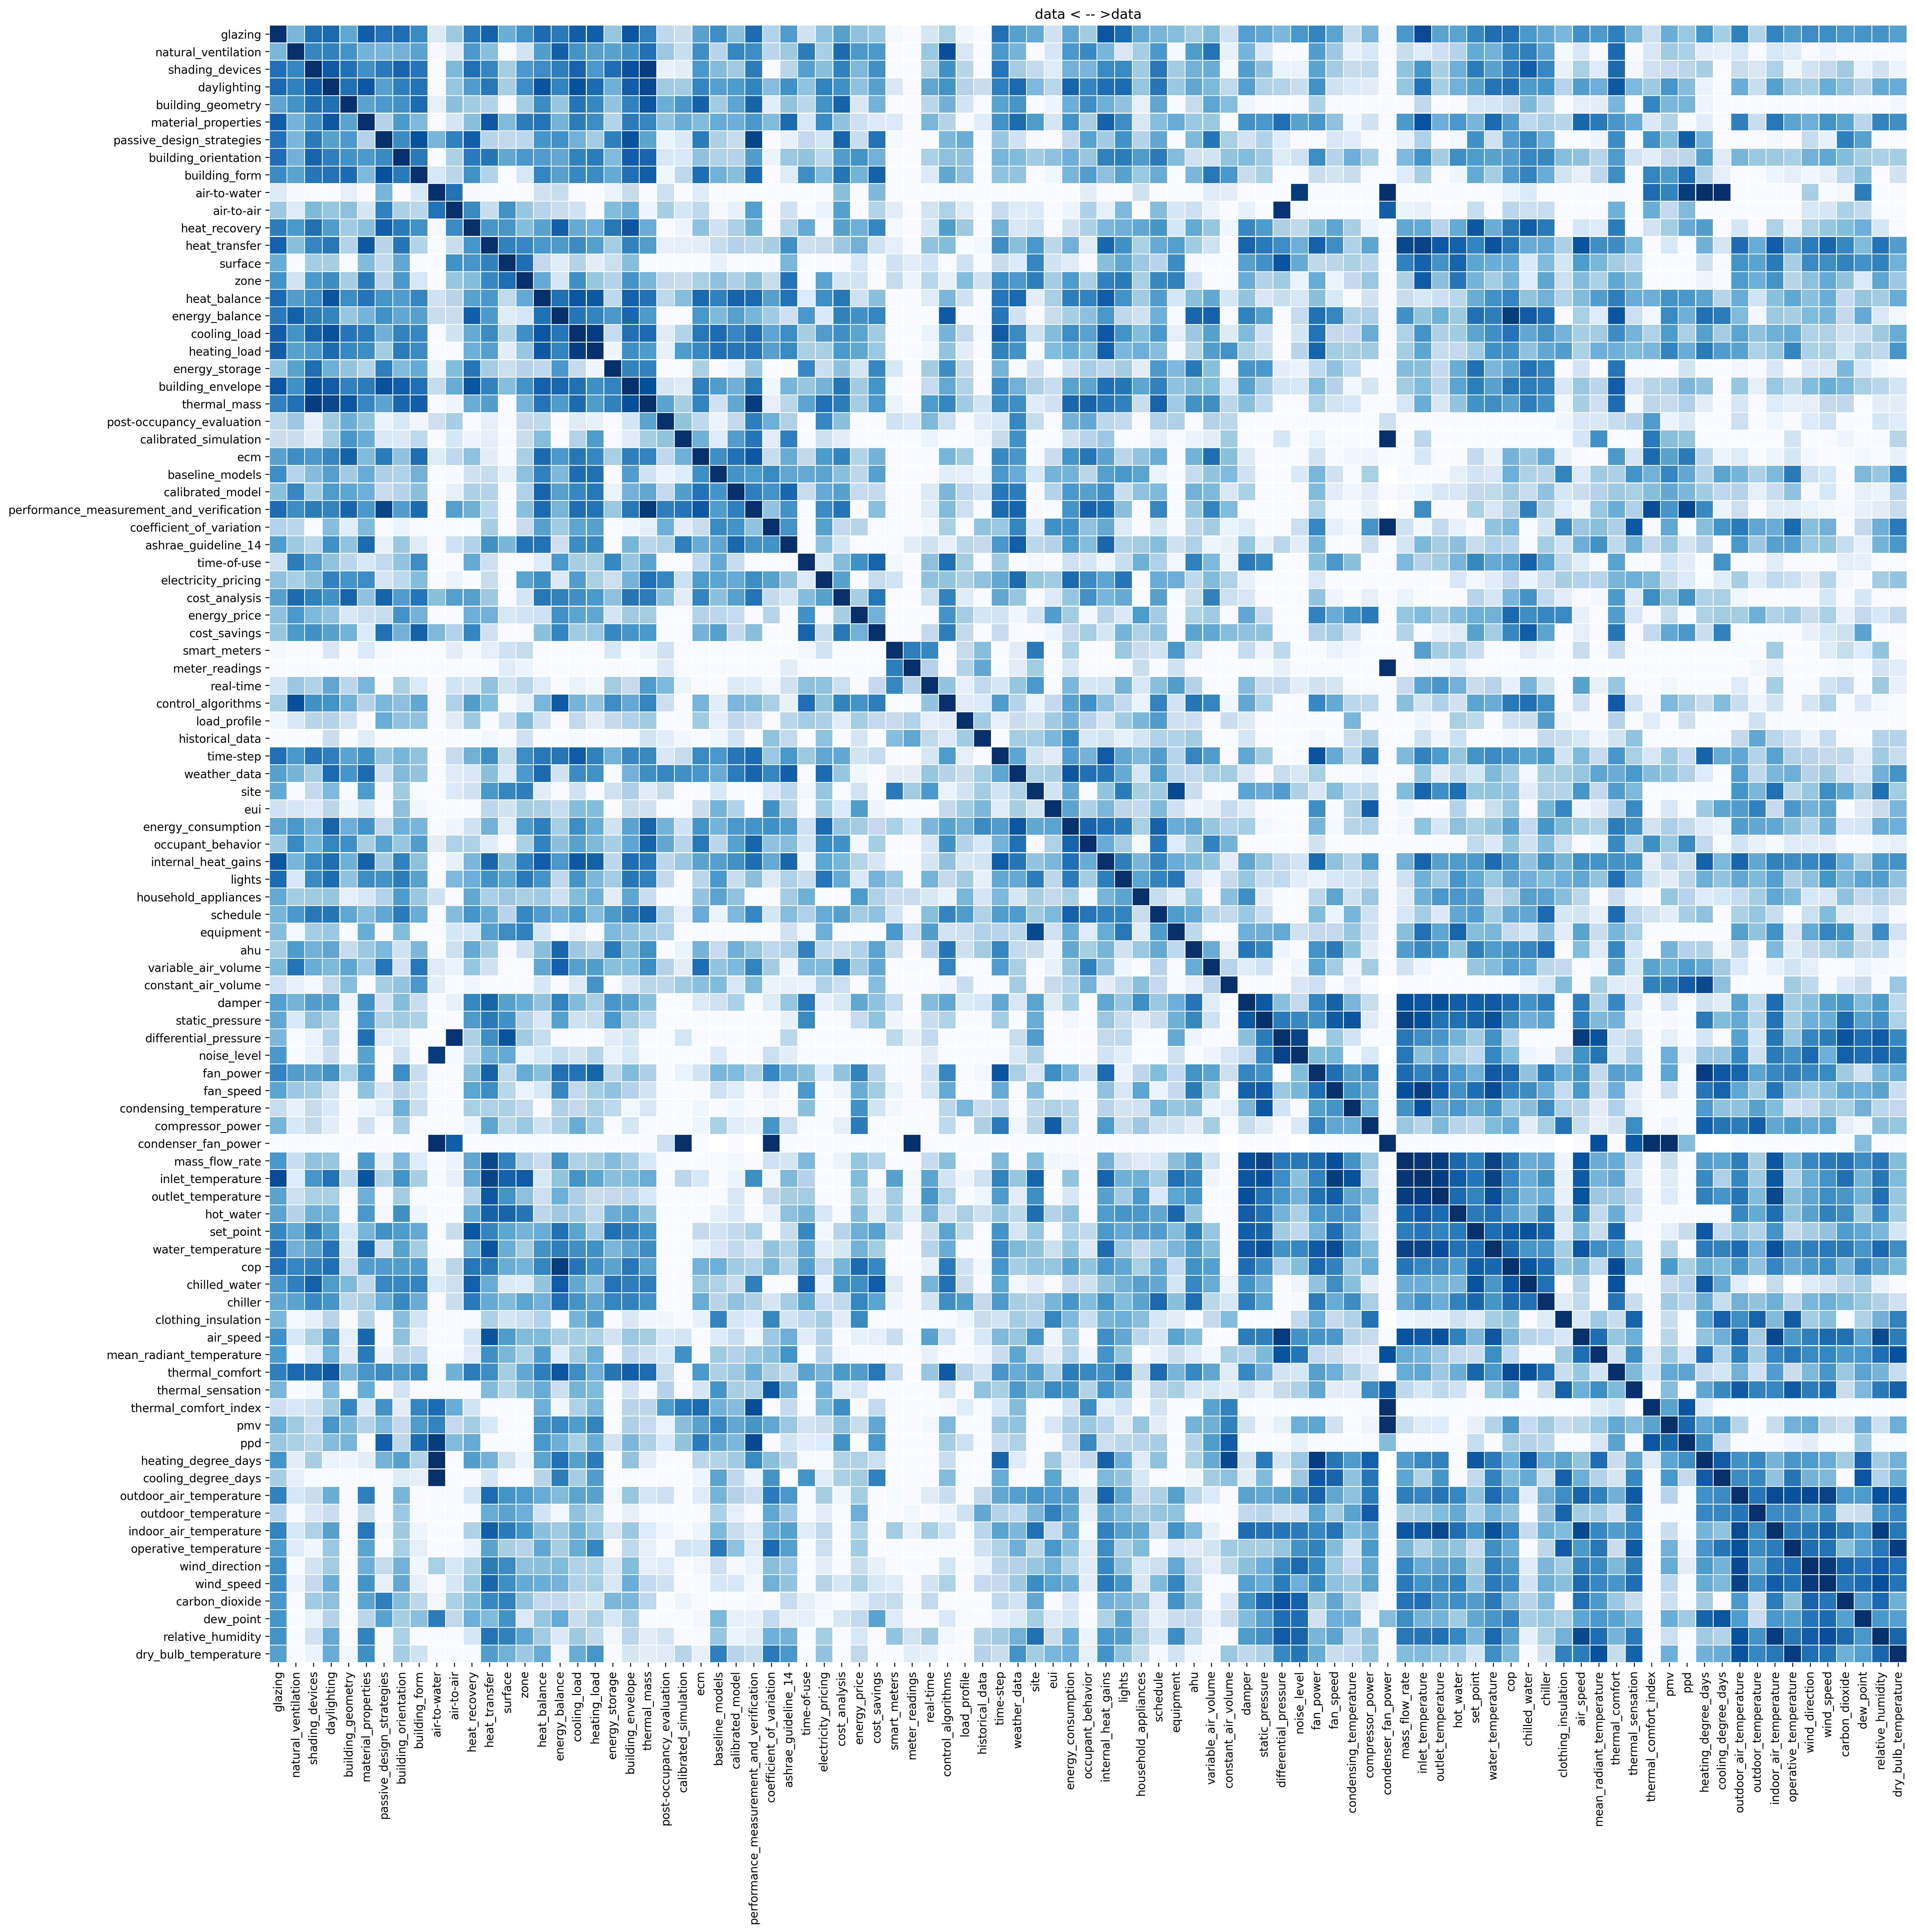

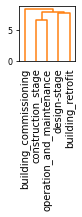

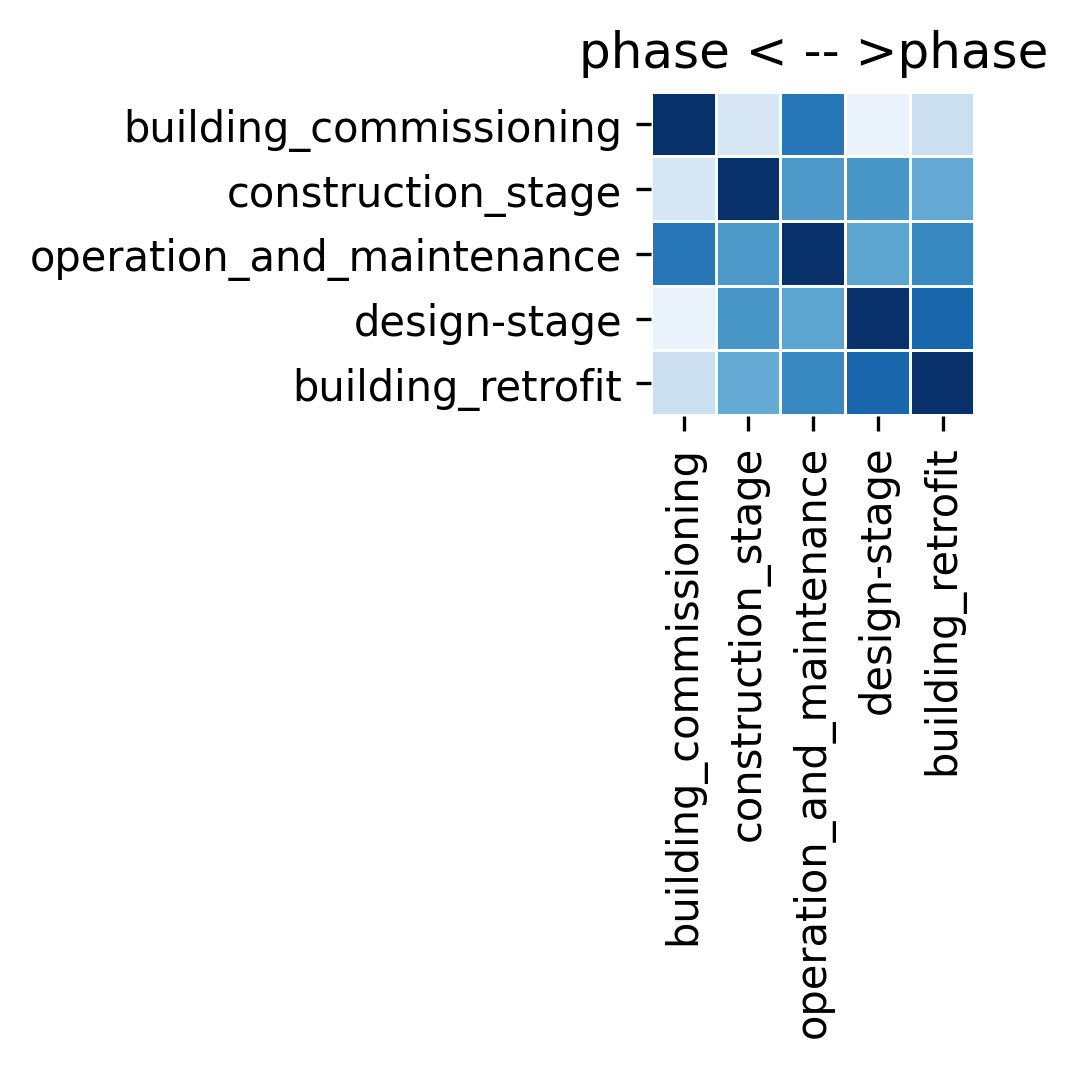

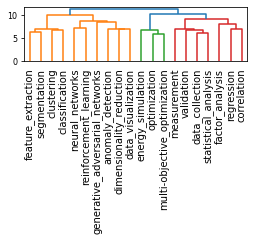

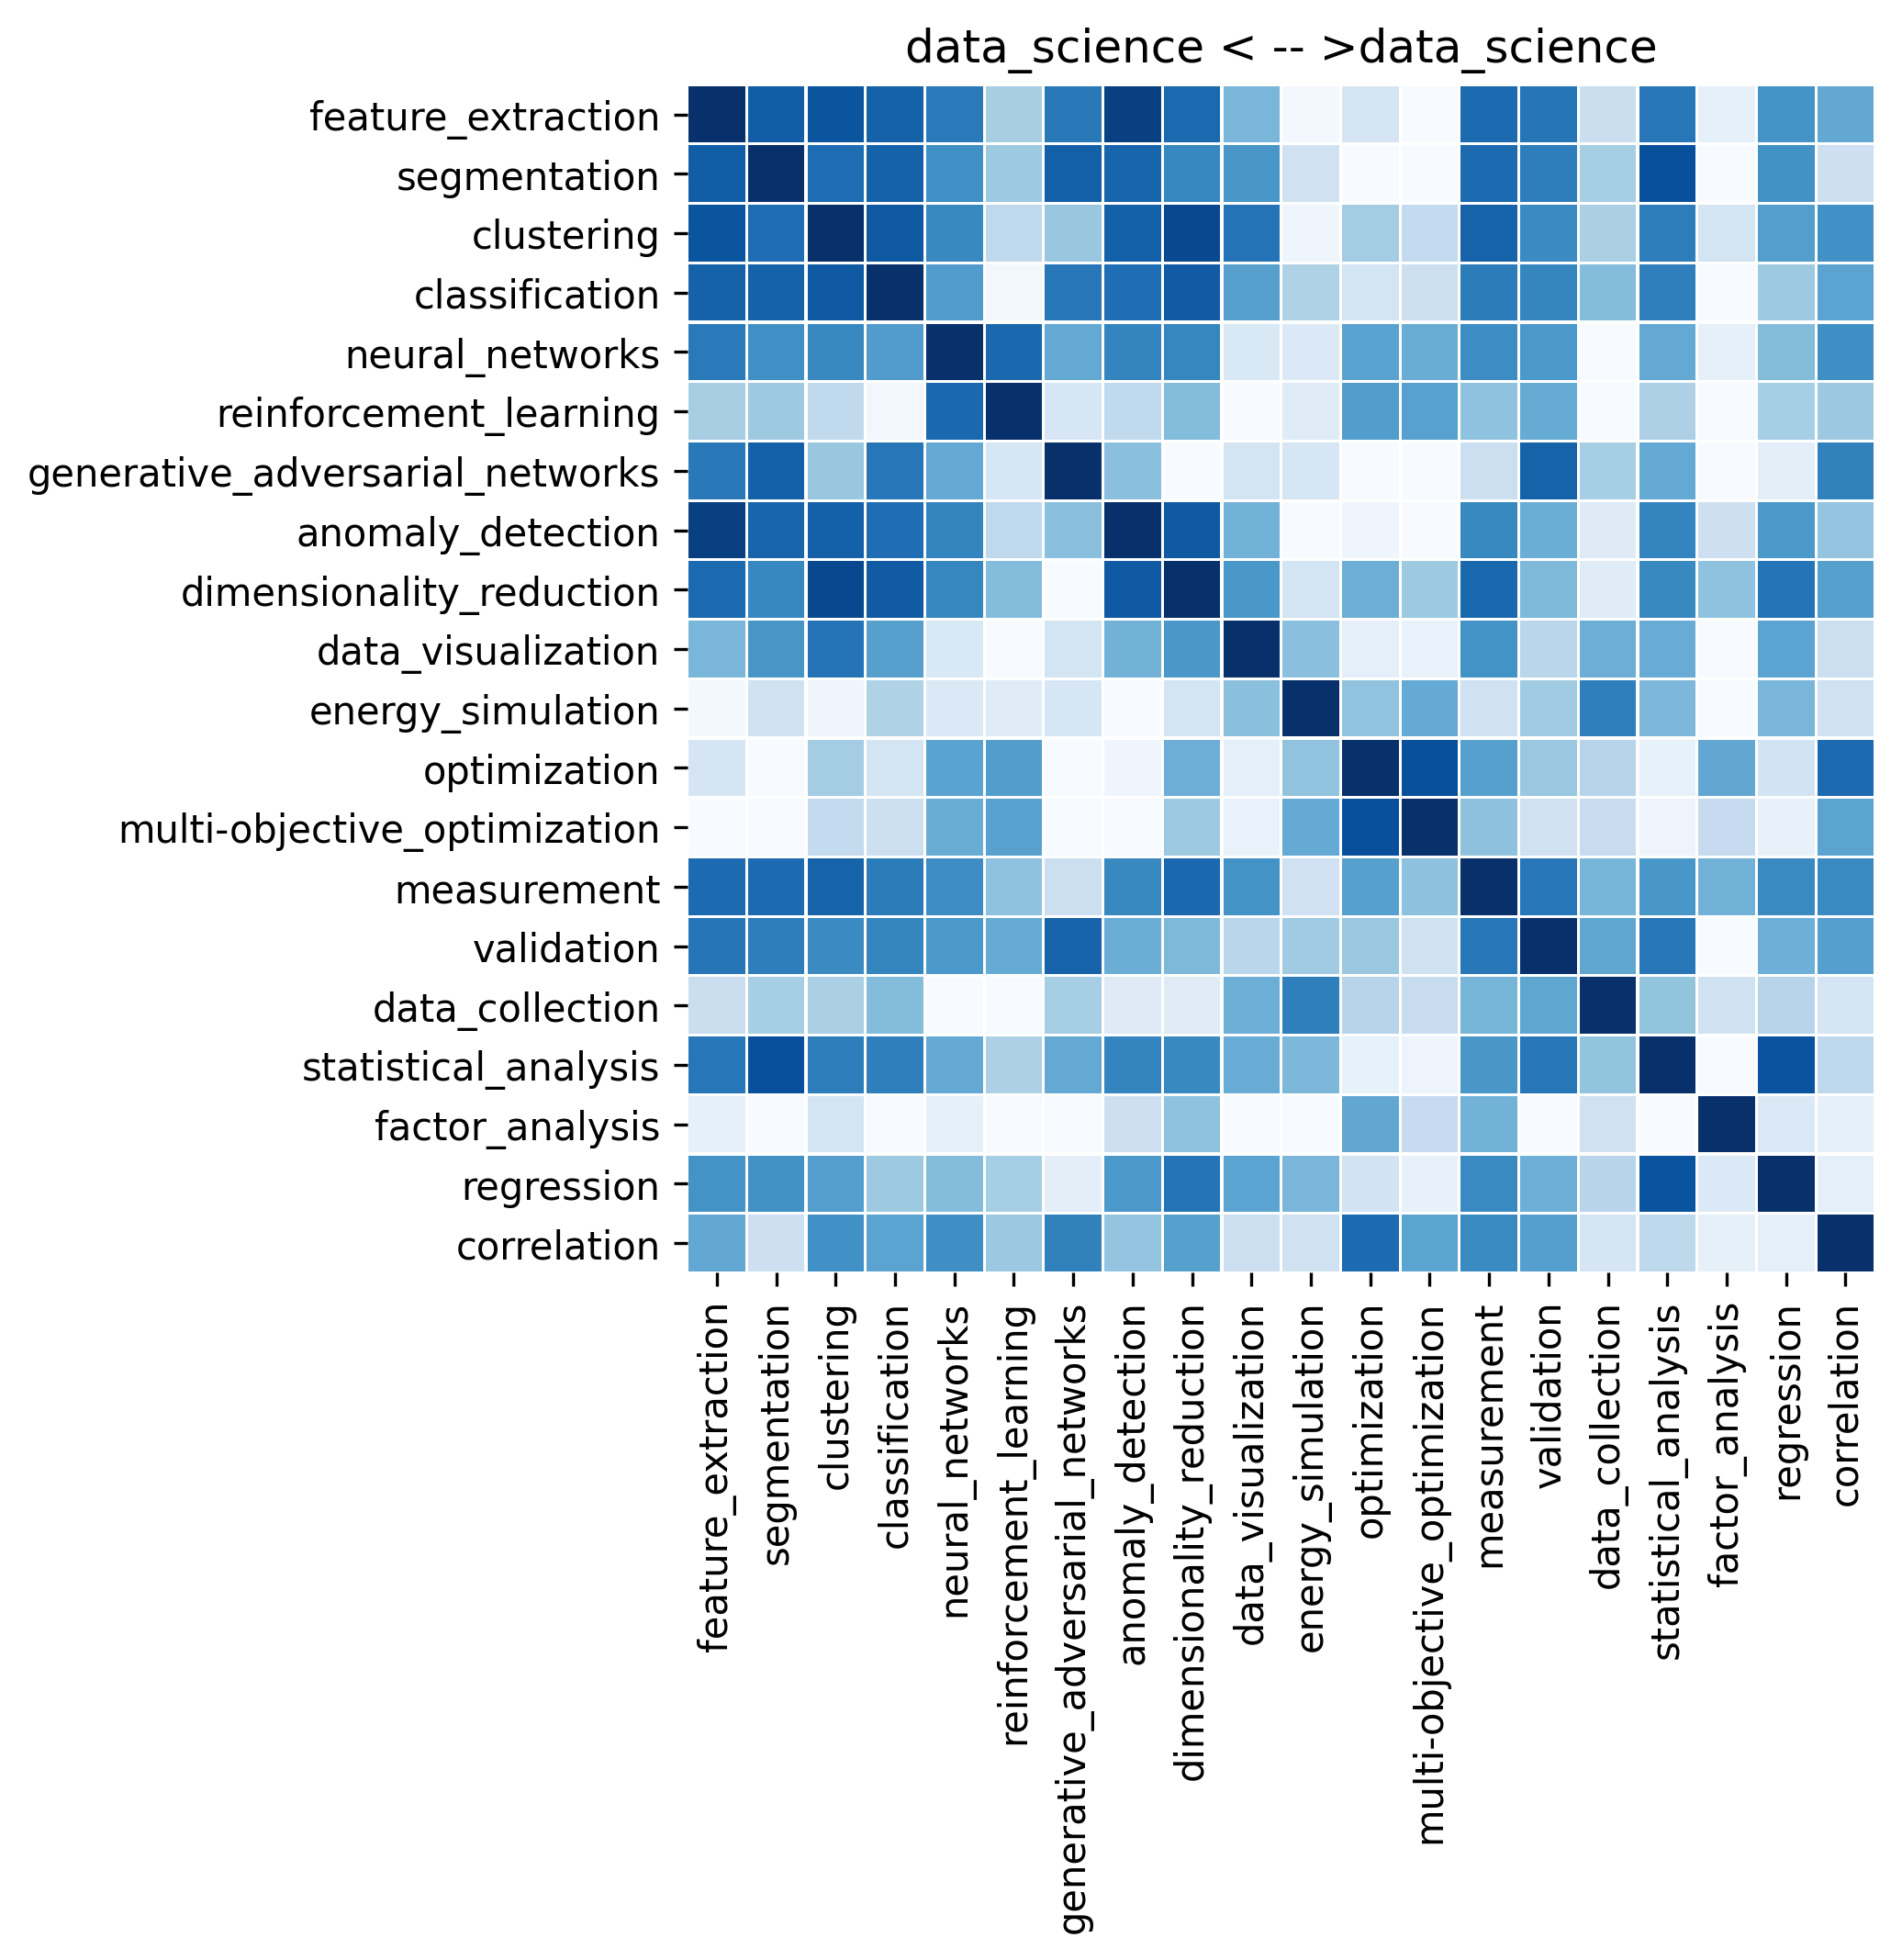

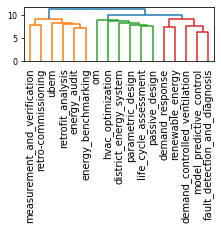

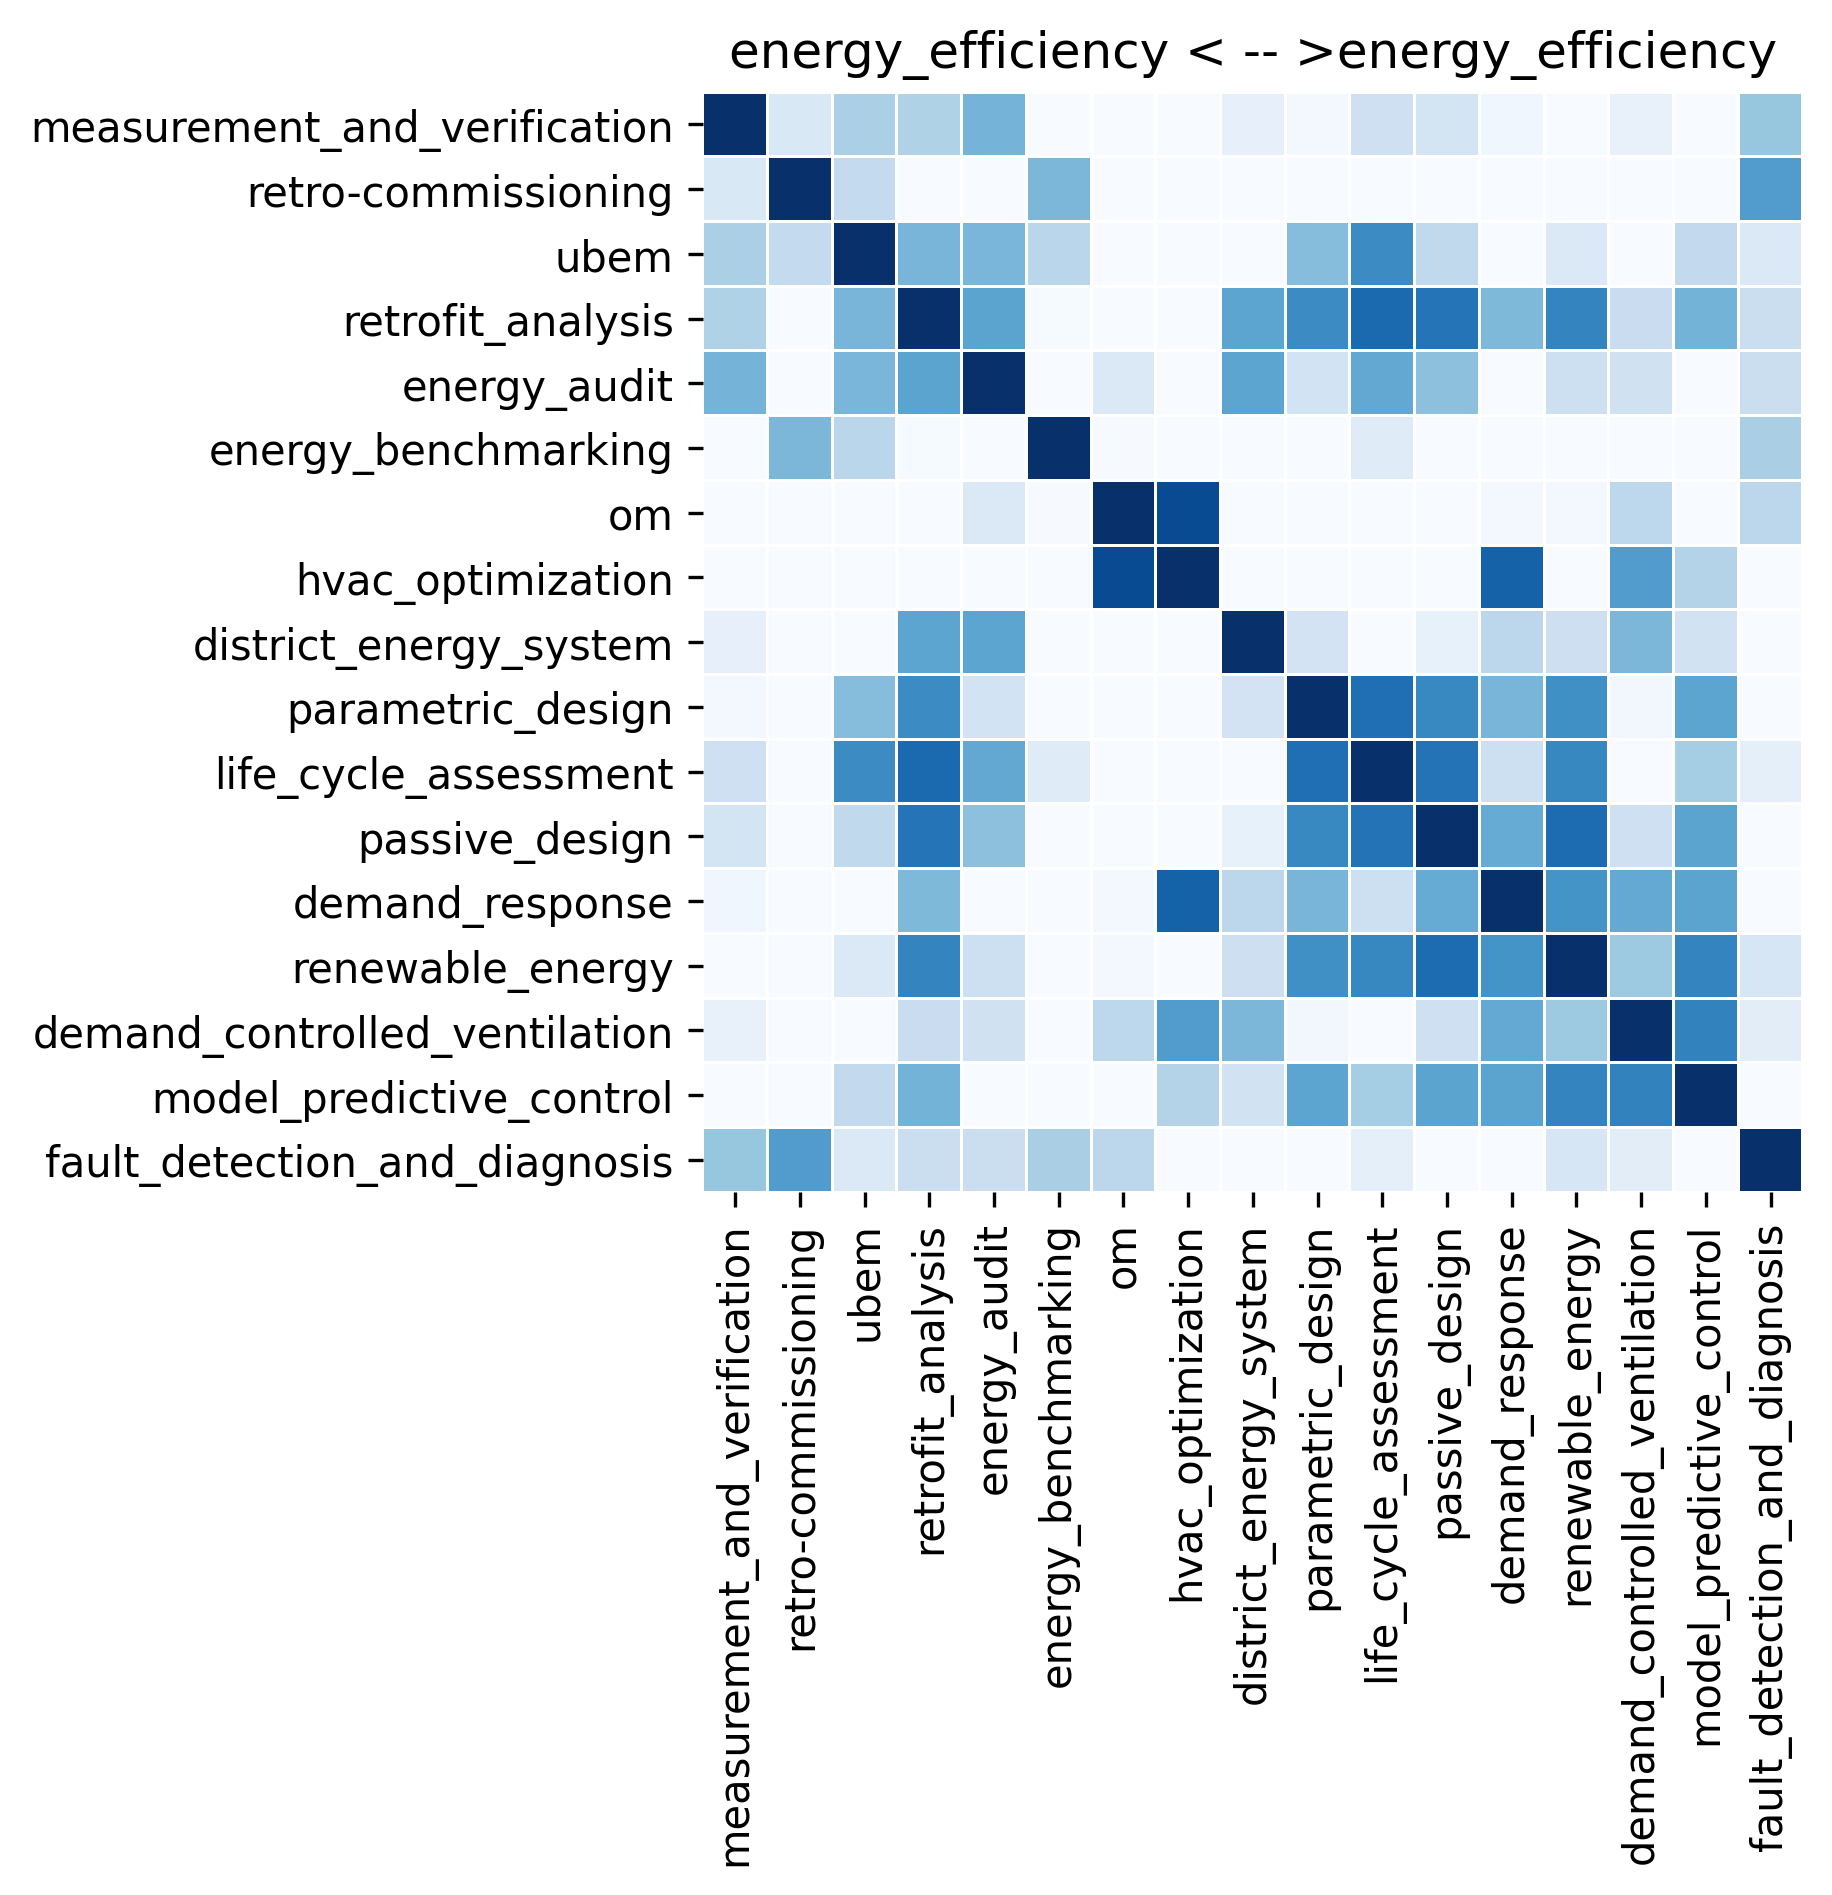

In [128]:
display(HTML('''<b>Colorbar indicating the correlation value</b><br>
                0.0 = weak correlation, 1.0 = strong correlation'''))
create_color_bar(min_v = 0.0, max_v = 1.0, bounds=None)
figN = 1
for key,df in all_dfs.items():
    display(HTML(str(figN)+"- <b>"+ key.split("-")[1]+ " category</b> HAC clustering."))
    df = df.set_index("index")
    wordsHere = list(df.columns)
    words_vectors = [model.get_vector(i) for i in wordsHere]
    words_vec_df = pd.DataFrame({"X":words_vectors, "y":wordsHere})
    
    X = [list(x)[:] for x in words_vec_df['X']]
    
    labels_2 = list(words_vec_df['y'])#[w if w in scope else "" for w in dataset['word'].tolist()[:]]

    fig = plt.figure(figsize=(len(X)/5.0,1 ))
    ax = fig.add_subplot(1, 1, 1)
    dendogram = sch.dendrogram(sch.linkage(X[:], method = "ward"),
                               color_threshold=10.,
                               labels=labels_2,#dataset['word'].tolist()[:],
                               orientation='top',
                               ax=ax,
                              leaf_rotation=90)
    ax.tick_params(axis='x', which='major', labelsize=10)
    ax.tick_params(axis='y', which='major', labelsize=8)
    df = df.drop_duplicates()
    dd = df[dendogram["ivl"]]
    plt.savefig("./plots/HAC/"+key+"_clusterd.svg")

    
    corr = dd.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(len(X)/3.0,len(X)/3.5), dpi=300)
    plt.title(key.split("-")[1]+" < -- >"+key.split("-")[1])

    sns.heatmap(corr , 
                cmap="Blues", 
                vmin=0.0, 
                vmax=1.0,
               cbar=False,
                square=True,
#                 mask = mask,
                linewidth=0.5,
               )
    dd = dd[dendogram["ivl"]]
    dd.to_csv("../data/clustered_keywords_order/"+key+".csv")
    plt.savefig("./plots/Correlation_matrix/"+key+".svg")
    plt.show()
    figN += 1
    

## 2.3. Cross realtion between different categories

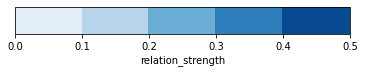

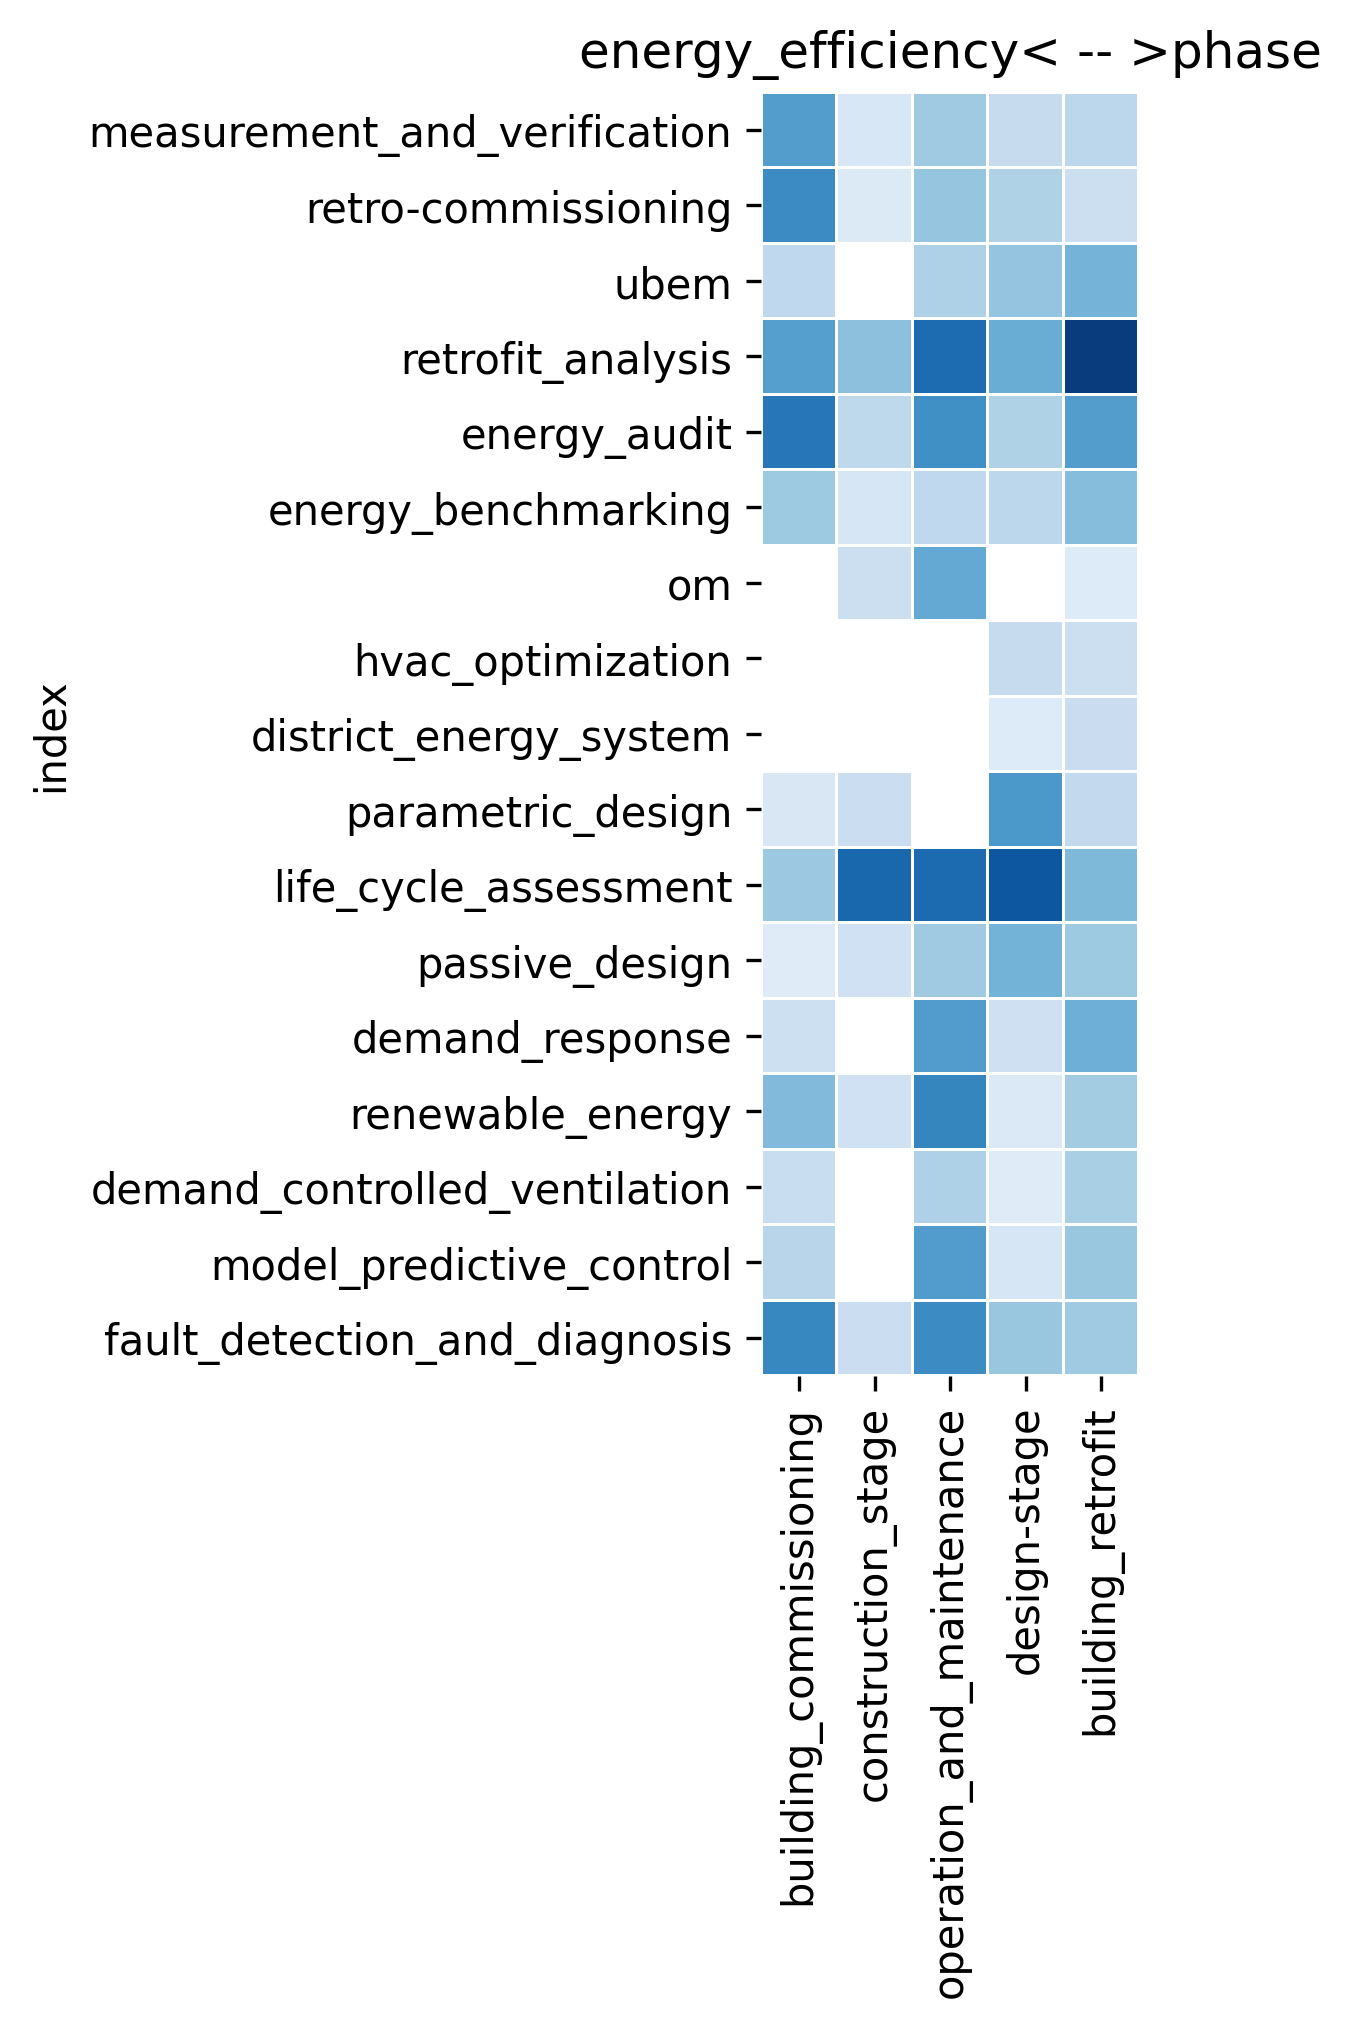

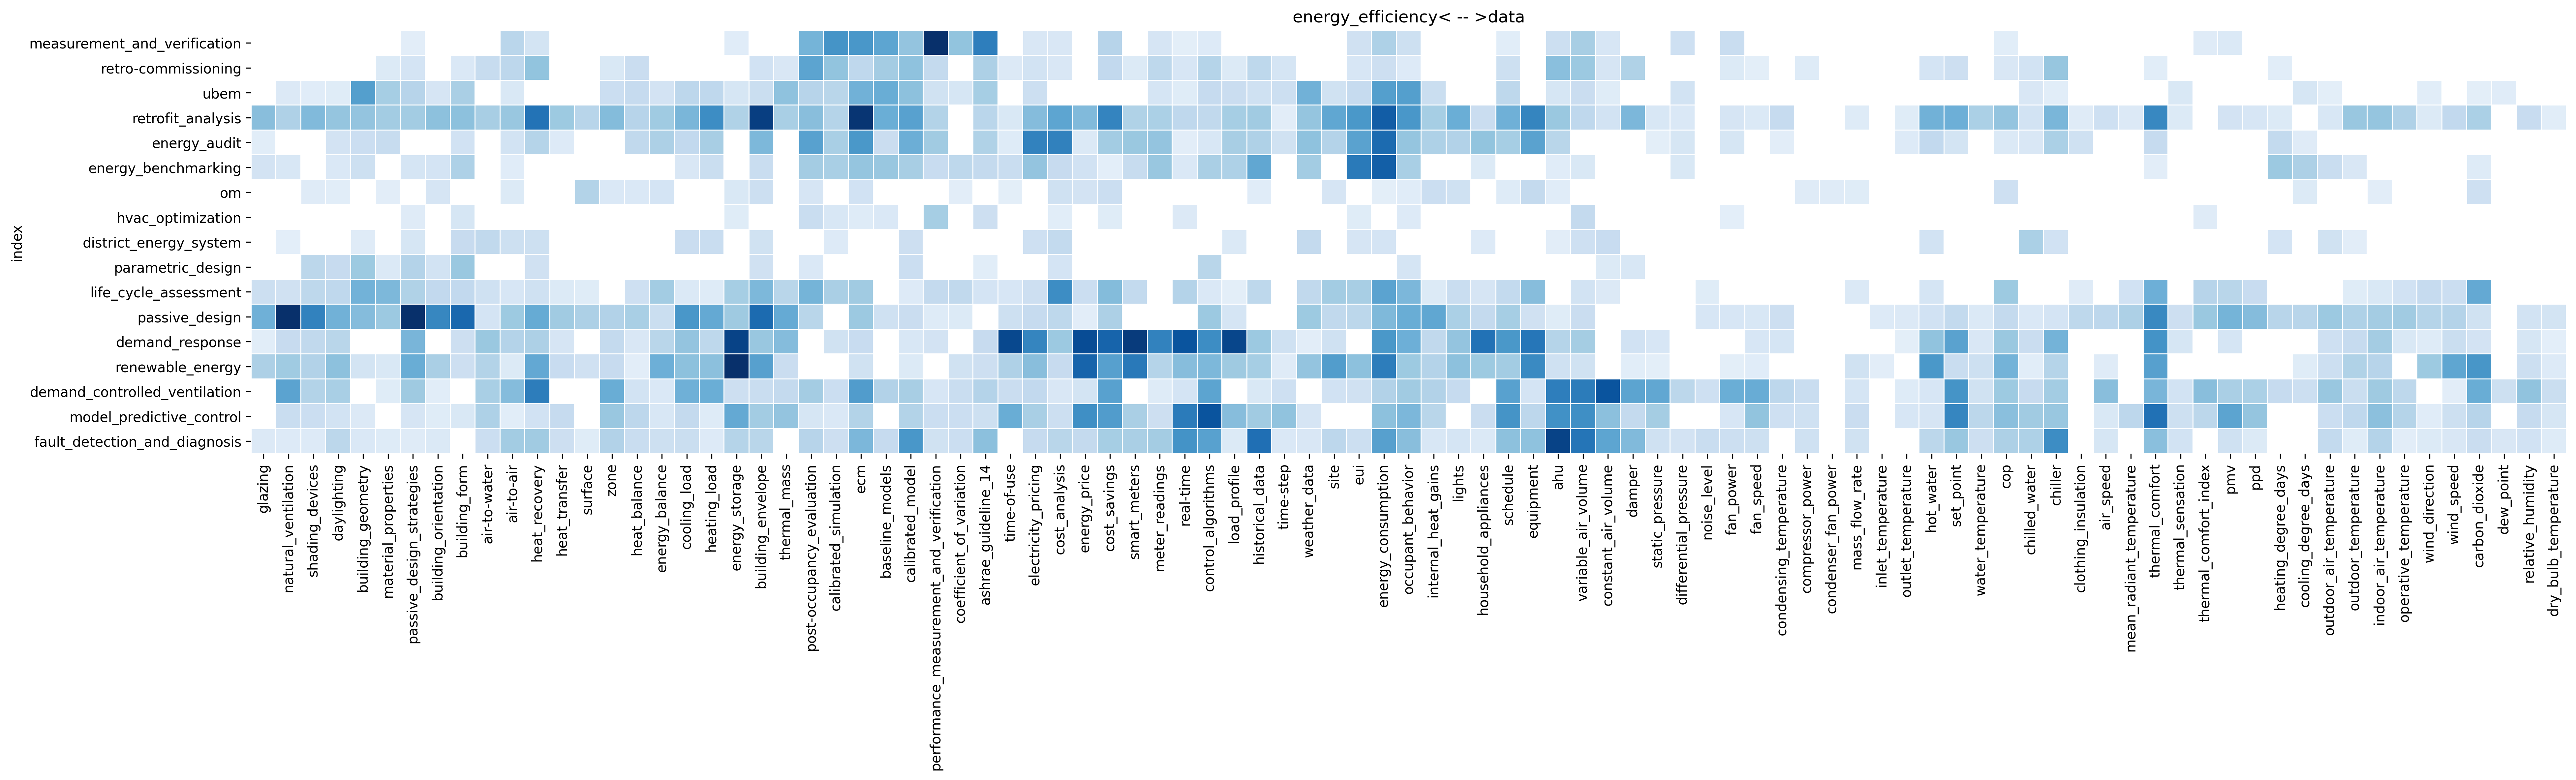

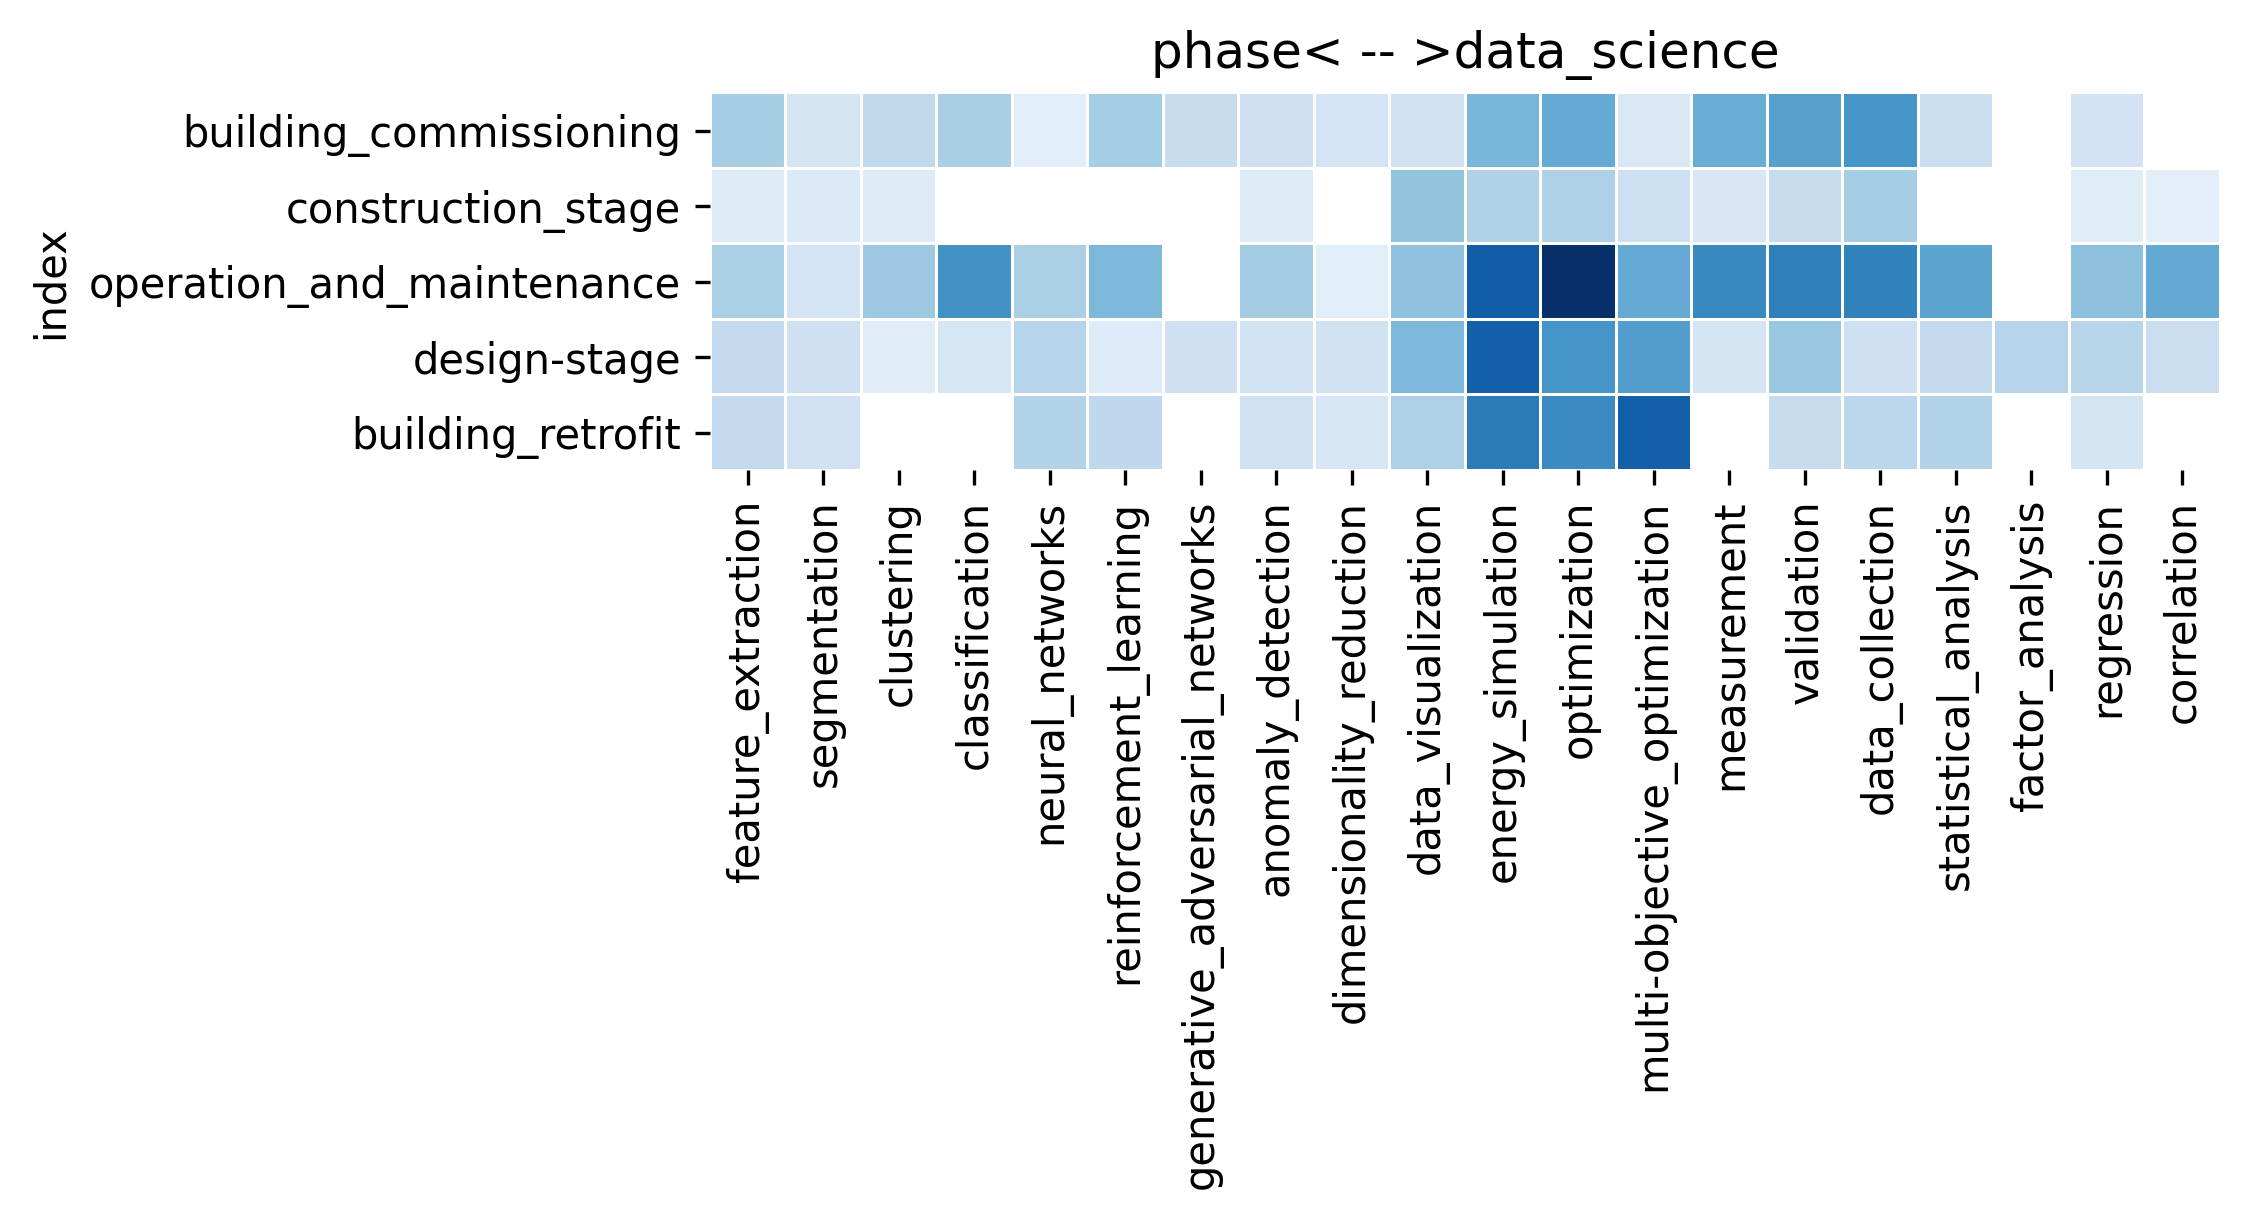

KeyboardInterrupt: 

In [130]:
display(HTML('''<b>Colorbar indicating the cross realtion values between each two categories</b><br>
                <p>These values are extracted from the cosine similarity metric </p>
                0.0 = weak correlation, 0.5 = strong correlation'''))

all_orders={}
create_color_bar(min_v = 0.0, max_v = 0.5, bounds=list(np.array(range(6))/10.))
figN = 1
for key, dd in all_dfs.items():
    dd2 = pd.read_csv("../data/clustered_keywords_order/"+key+".csv").set_index("index")
    all_orders[key.split("-")[1]] = list(dd2.columns)

cmap_ = cm.get_cmap("Blues", 5)
for key, dd in all_dfs.items():
    display(HTML(str(figN) + "- "+ key.replace("-", "< -- >")))
    dd2 = pd.read_csv("../data/clustered_keywords_order/"+key+".csv").set_index("index")
    dd2 = dd2.reindex(all_orders[key.split("-")[0]])
    plt.figure(figsize=(len(dd2.columns)/3.0,len(dd2.index)/3.0), dpi=300)
    plt.title(key.replace("-", "< -- >"))
    sns.heatmap(dd2,
                cmap="Blues",
                square=True,
                vmin=0.0,
                vmax=0.5,
                linewidth=0.5,
               cbar= False
               )
    plt.savefig("./plots/Cross_realtion_matrix/"+key+"_cross_rel.svg")
    plt.show()
    figN +=1


# 3. Word embeddings 2d projection visualization (Figure 7)

In [61]:
with open("../data/bookmark.json", 'r') as bm:
    bookmark = json.loads(bm.read())
    
word_pos = pd.DataFrame(bookmark[0]['projections'])
word_pos["word"] = embd.reset_index()["word"]
word_pos = word_pos.set_index("word")

embd_with_word_pos = pd.concat([embd, word_pos], axis=1)
xy = embd_with_word_pos[["umap-0","umap-1", "category"]].rename({"umap-0":"x", "umap-1":"y"}, axis=1)#.plot(kind="scatter")
xy["color"] = xy["category"].apply(lambda x : float(list(xy["category"].value_counts().index).index(x))+1.0)

pallete = {1: "#F15A22", 2:"#6DC8BF", 3:"#B72467", 4:"#CBDB2A"}
xy["color_p"] = xy["color"].apply(lambda x : pallete[int(x)])
xy

x         y           category  color  \
word                                                                     
design-stage             -5.362977  1.362921              phase    4.0   
early_design_stage       -5.254641  1.392164              phase    4.0   
early_design_stages      -5.098222  1.622848              phase    4.0   
preliminary_design       -5.208376  1.574768              phase    4.0   
conceptual_design        -5.150525  1.401573              phase    4.0   
...                            ...       ...                ...    ...   
renewable_energy          3.146908  3.324934  energy_efficiency    3.0   
renewable_energy_sources  3.169169  3.327431  energy_efficiency    3.0   
renewable_energies        3.067506  3.407121  energy_efficiency    3.0   
retrofit_analysis        -3.673592  3.333076  energy_efficiency    3.0   
retrofit                 -3.604421  3.830811  energy_efficiency    3.0   

                          color_p  
word                               
design-stage              #CBDB2A  
early_design_stage        #CBDB2A  
early_design_stages       #CBDB2A  
preliminary_design        #CBDB2A  
conceptual_design         #CBDB2A  
...                           ...  
renewable_energy          #B72467  
renewable_energy_sources  #B72467  
renewable_energies        #B72467  
retrofit_analysis         #B72467  
retrofit                  #B72467  

[271 rows x 5 columns]

In [63]:
node_degrees = nx.degree(G)
nx.set_node_attributes(G, "degree", node_degrees)


graph_colors = xy[["color_p"]].to_dict()["color_p"]
xy["pos"] = xy.apply(lambda x : (x["x"], x["y"]), axis =1)
graph_pos = xy["pos"].to_dict()


In [64]:
main_words = []
for k , v in G.degree():
    if k in [i[0] for i in phase+data+data_science+energy_efficiency]:
        main_words.append(k)
    else:
        main_words.append("")

[]

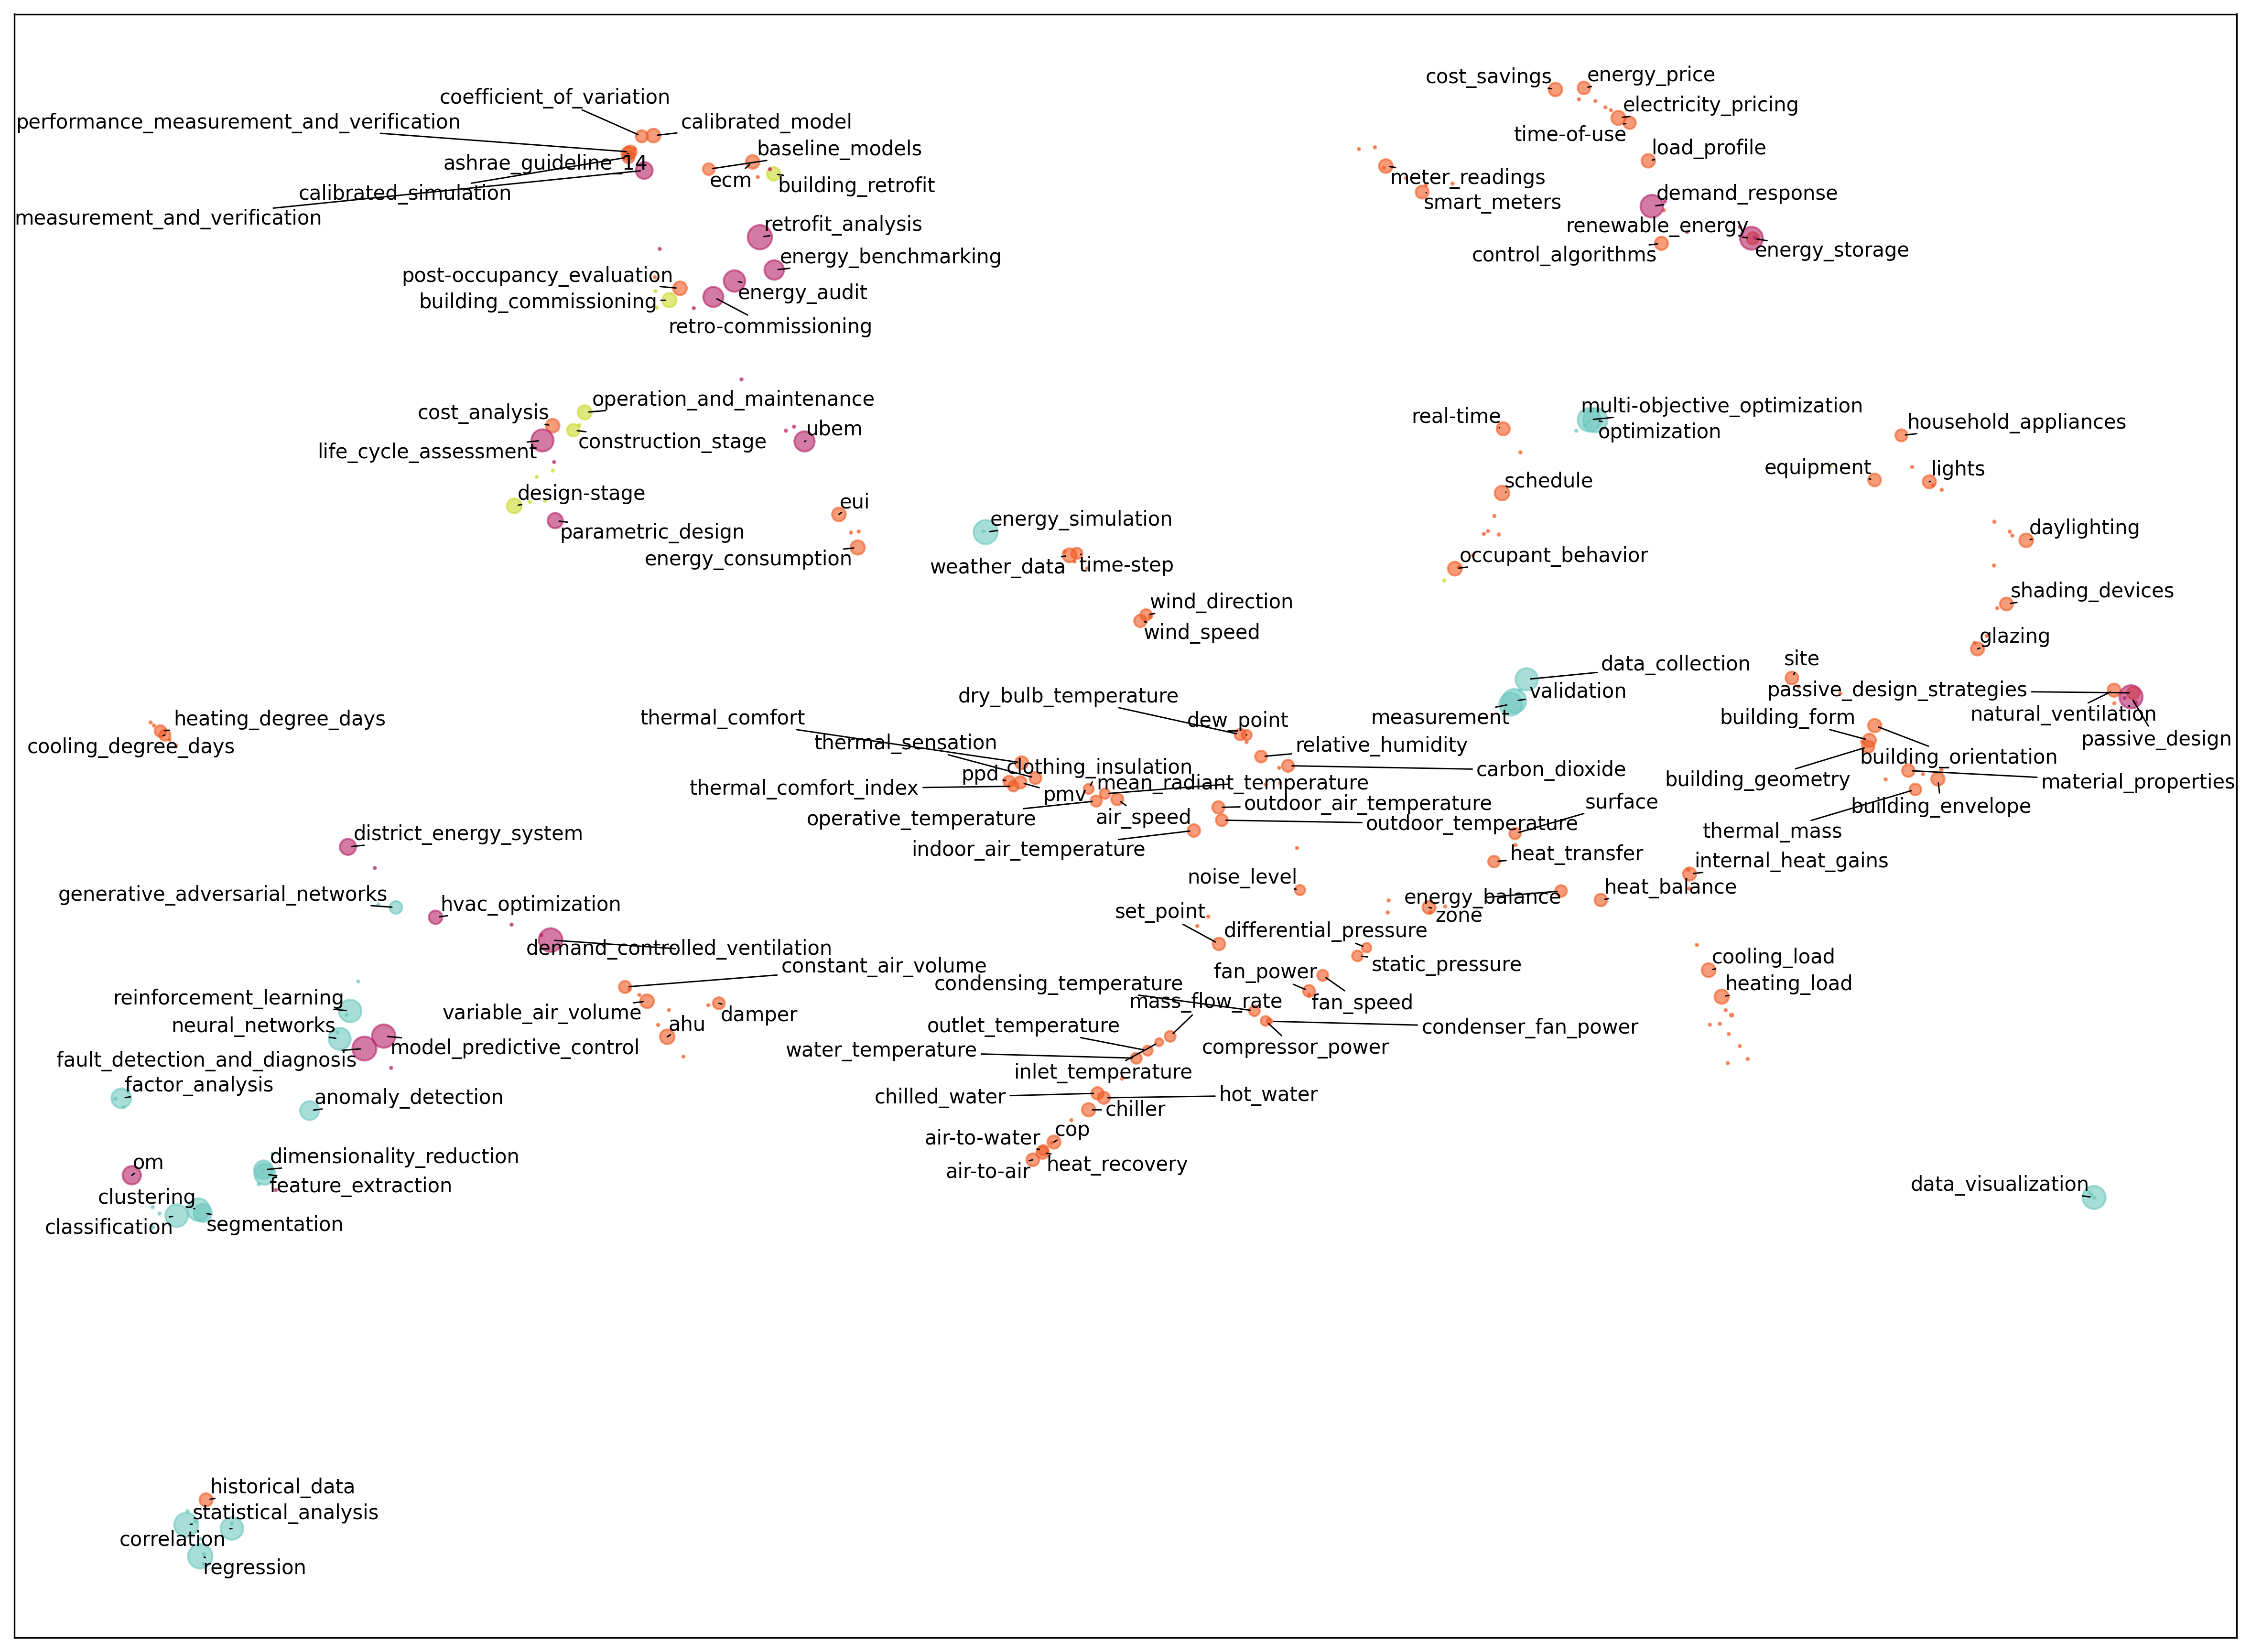

In [67]:
plt.figure(figsize=(20, 15), dpi=300)
nx.draw_networkx_nodes(G, pos = graph_pos, 
        node_color = [v for k, v in graph_colors.items()],
        node_size=[v*1.3 for k , v in dict(degree).items()],
       width=0.0, 
       alpha = 0.6)
texts = []
for indx, i in enumerate(main_words[:]):
    if i != "":
        texts.append(plt.text(xy.reset_index().loc[indx]["x"], xy.reset_index().loc[indx]["y"], i))
adjust_text(texts, only_move={'texts':'x'}, arrowprops=dict(arrowstyle="-", color='k', lw=0.7))
plt.savefig("./plots/graph_embeddings_projection.svg")
# nx.draw_networkx_labels(G, pos=graph_pos, labels=main_words)
plt.plot()